# `Immigration trail` & `Demography` in USA
### *Data Engineering Capstone Project*


### `Project Summary:`

**This** is my final Capstone project for the `Udacity Data Engineering Nanodegree program`. We're given a discretion to choose our own data and project with guided rubric as such how to collect, clean, explore, analyze data and present our findings. The final product should converge out with a set of clean tables, `instantly ready to be analyzed` by data scientists, analysts to gain much needed insight from them. 

Considering it is data engineering project, we're expected to apply all the data engineering knowledge we've learned from this `Nano-Degree program`. This notebook offers step by step presentation how the given data was cleaned, explored and transformed to final set of tables.

As part of the project resources, we're given 5 different data sets. We can add more if we want to? I chose to bind in using Udacity's data set for this Final Capstone Project.

### **`Data Table Synopsis:`**

The following data sets were used for this project with specific table-column attributes:

`1.` `I94 Immigration Data:` contains officially selected detail information about international visitors arriving in different US immigration ports. This table is available both in SAS and CSV table format.

`2.` `Airport Code Table:` includes information about different airports located in different US port cities. This table is in csv format.

`3.` `Global and US City temperature data table:` is the largest table with 8 million records dated back to 1743. Incorporates temperature data about different world and US cities, which is a csv format table.

`4.` `U.S. City Demographic Data:` comprises with demographic information about US cities, such as the median age, total population. The data-table is in csv format.

`5.` `I94_SAS_Labels_Descriptions.SAS:` labels different City, Port, State, Country data informations. This table mainly decodes 'immigration data' table columns with SAS data format.

### `Sourcing data tables: `

The following data sets were given to us for this project to engineer the data Pipeline. The source of these datasets can be trace back with attached link in my `ReadMe.md` file on github [link please](). The details of these data tables are available with sourced link here.

`1.` I94 Immigration Data: The immigration data comes from the US National Tourism and Trade Office. [Immigration_data](https://www.trade.gov/national-travel-and-tourism-office)

`2.` City, Port, State, Country data labels came from `I94_SAS_Labels_Descriptions.SAS` data file. [SAS_Data](...)

`3.` Airport Code Table: This is a simple table of airport codes and corresponding cities. [Airport Data](https://datahub.io/core/airport-codes#data) 

`4.` Global and US City temperature data table: Came from 'GlobalLandTemperaturesByCity.csv' file. [Github...]

`5.` U.S. City Demographic Data: The demographic data comes from OpenSoft. [Demography Data](https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/)

### `Query visualization & Data Cleaning:`

I will be using SQL queries throughout this notebook to visualize the my data cleaning outcomes. These queries will show us in brief the potential of good data cleaning with analytical projection.

+ I've added altogher `37-Queries` throughout this notebook to portray the analytical possiblities of good data transformatino and data modeling. An efficient data-model design could extract out very critical insight from the available datasets.

+ `NOTE: `If joins are not carefully designed, they may produce inadquate findings. So chosing apt join is a critical factor.

### `Capstone_ETL.py  coding source:`

This notebook represents the most detail data engineering work I've done with this project. I'll  be using some of the selected code lines from this notebook to create a data pipeline with my  `Capstone_ETL.py` file which will effectively send the all the cleaned, transformed or engineered datasets to the cloud as a final data-table product.

###  **`Project Steps Guidelines:`**
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

###  `Programming Scope: `

+ I used `PySpark` to read, explore and assessing the tables.
+ `SQL Query language` was extensively used to analyze the transformed tables.
+ `Python` package pandas,seaborn and matplotlib was used to visualize analytical results. 

### `Loading all the needed library:`

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import pyspark
from pyspark.sql.functions import asc, desc
from pyspark.sql.functions import monotonically_increasing_id

In [231]:
import datetime as dt
from datetime import datetime
from pyspark.sql.functions import udf

In [232]:
from pyspark.sql import SparkSession
from pyspark.sql.types import DateType, IntegerType, DoubleType
from pyspark.sql.functions import udf, split, col, lit, year, month, upper, lower, to_date
from pyspark.sql.functions import monotonically_increasing_id, dayofmonth,when
from pyspark.sql.functions import datediff, isnan, when, count, desc, avg, round,sum

> `SAS date type conversion function:` The arrival and departure date column in immigration table is SAS date type, so we needed to convert them to  python date type. I used a widely used function for this date transformation.

In [233]:
# transforming SAS date type
def SAS_to_date(date):
    if date is not None:
        return pd.to_timedelta(date, unit='D') + pd.Timestamp('1960-1-1')
    
SAS_to_date_udf = udf(SAS_to_date, DateType())

> `Data Quality checks function:` My data quality check function takes table as a parameter checks that the table at least has a certain number of records. It is not an empty table.

In [234]:
def record_count(table):
    record_num = table.count()
    #table = str(table)
    if record_num <= 0:
        raise ValueError("Not data is found with this table!")
    else:
        print(f"is not empty, it has total {record_num} records.")
        

In [235]:
output_data = './Results_Details/' # need work here?

In [236]:
#Some of the checks you can do are

#Check if primary keys are not storing any null values
#Check if the foreign keys are set as NOT NULL
#Check if the data is correctly inserted into tables by checking the counts?

In [8]:
# Perform quality checks here
#cur.execute("SELECT COUNT(*) FROM airports")
#conn.commit()
#if cur.rowcount < 1:
#    print("No data found in table airports")

In [9]:
#creating a spark session
#spark = SparkSession \
#               .builder \
#               .appName("Capstone - Non_Cloud_Application") \
#               .getOrCreate()

In [237]:
spark = SparkSession.builder \
            .appName("my_app") \
            .config('spark.sql.codegen.wholeStage', False) \
            .getOrCreate()


In [10]:
#from pyspark.sql import SparkSession

#spark = SparkSession.builder.\
#config("spark.jars.repositories", "https://repos.spark-packages.org/").\
#config("spark.jars.packages", "saurfang:spark-sas7bdat:2.0.0-s_2.11").\
#enableHiveSupport().getOrCreate()

#df_immigration = spark.read.format('com.github.saurfang.sas.spark').load('../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat')


In [11]:
#spark = SparkSession \
#        .builder \
#        .config("spark.jars.repositories", "https://repos.spark-packages.org/") \
#        .config("spark.jars.packages", "org.apache.hadoop:hadoop-aws:2.7.0,saurfang:spark-sas7bdat:2.0.0-s_2.11") \
#        .config("spark.hadoop.fs.s3a.multiobjectdelete.enable","false") \
#        .enableHiveSupport() \
#        .getOrCreate()

In [12]:
#immigration_df = spark.read.format('com.github.saurfang.sas.spark').\
#                             load('../../data/18-83510-I94-Data-2016/i94_jun16_sub.sas7bdat')

In [13]:
#columns_tobe_deleted = ["validres", 'delete_days', 'delete_mexl',\
#                'delete_dup', 'delete_visa', 'delete_recdup']
#skimmed_data_set = immigration_df.drop(*columns_tobe_deleted)
#skimmed_data_set.columns
#df.drop(*columnsDrop).show()

In [14]:
#Immigration_df = immigration_df.withColumn('arrive_date', SAS_to_datetime_udf(col('arrive_date')))

## `Data Exploration`,  `Cleaning` & `Evaluation` :

### `Immigration Data: `

### `I94 Immigration Data as SAS format :  `

In [238]:
immig_sample = 'immigration_data_sample.csv'
df_immigration = spark.read.format('csv').options(header=True, delimiter=',').load(immig_sample)
df_immigration.toPandas().head(3)

,_c0,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,2027561,4084316.0,2016.0,4.0,209.0,209.0,HHW,20566.0,1.0,HI,...,None,M,1955.0,07202016,F,None,JL,56582674633.0,00782,WT
1,2171295,4422636.0,2016.0,4.0,582.0,582.0,MCA,20567.0,1.0,TX,...,None,M,1990.0,10222016,M,None,*GA,94361995930.0,XBLNG,B2
2,589494,1195600.0,2016.0,4.0,148.0,112.0,OGG,20551.0,1.0,FL,...,None,M,1940.0,07052016,M,None,LH,55780468433.0,00464,WT


In [239]:
print("Number of rows: " + str(df_immigration.count()) + " \nand Number of columns: " + str(len(df_immigration.columns)))

Number of rows: 1000 
and Number of columns: 29


In [17]:
df_immigration.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- cicid: string (nullable = true)
 |-- i94yr: string (nullable = true)
 |-- i94mon: string (nullable = true)
 |-- i94cit: string (nullable = true)
 |-- i94res: string (nullable = true)
 |-- i94port: string (nullable = true)
 |-- arrdate: string (nullable = true)
 |-- i94mode: string (nullable = true)
 |-- i94addr: string (nullable = true)
 |-- depdate: string (nullable = true)
 |-- i94bir: string (nullable = true)
 |-- i94visa: string (nullable = true)
 |-- count: string (nullable = true)
 |-- dtadfile: string (nullable = true)
 |-- visapost: string (nullable = true)
 |-- occup: string (nullable = true)
 |-- entdepa: string (nullable = true)
 |-- entdepd: string (nullable = true)
 |-- entdepu: string (nullable = true)
 |-- matflag: string (nullable = true)
 |-- biryear: string (nullable = true)
 |-- dtaddto: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- insnum: string (nullable = true)
 |-- airline: string (nullable = tru

### Quick over-view of `Null vaues` with this `immigration data` table:

In [18]:
# Number of null values >> isnull() function returns the count of null values of column in pyspark
print("Number of NULL values by each column: ")
df_immigration.select([count(when(col(c).isNull(), c))\
                         .alias(c) for c in df_immigration.columns]).show(n=2, truncate=False, vertical=True)

Number of NULL values by each column: 
-RECORD 0--------
 _c0      | 0    
 cicid    | 0    
 i94yr    | 0    
 i94mon   | 0    
 i94cit   | 0    
 i94res   | 0    
 i94port  | 0    
 arrdate  | 0    
 i94mode  | 0    
 i94addr  | 59   
 depdate  | 49   
 i94bir   | 0    
 i94visa  | 0    
 count    | 0    
 dtadfile | 0    
 visapost | 618  
 occup    | 996  
 entdepa  | 0    
 entdepd  | 46   
 entdepu  | 1000 
 matflag  | 46   
 biryear  | 0    
 dtaddto  | 0    
 gender   | 141  
 insnum   | 965  
 airline  | 33   
 admnum   | 0    
 fltno    | 8    
 visatype | 0    



In [19]:
# highest number of null value in a single column > entdepu
# df_immigration.select([count(when(col('entdepu').isNull(),True))]).show()

`Code Link: ` [Source Code](https://www.datasciencemadesimple.com/count-of-missing-nanna-and-null-values-in-pyspark/#:~:text=Count%20of%20null%20values%20of%20dataframe%20in%20pyspark,of%20null%20and%20missing%20values%20of%20that%20column)

+ **Eliminating null values with largest percentage/number.**

`High null value Columns: `  I've decided to eliminate three columns > `occup`, `insum` & `entdepu` from the immigration data set seeing to their above 96% `Null Values` included in those columns out of 1000 rows.

`Low null value columns: ` Columns `i94addr`, `gender`, `airline`, `fltno`, `Departure_Date` has `Null values` but in a insignificantly lower number( less than 10% of total ), so I decided to keep them.

In [20]:
# null value with 'occup' column
df_immigration.groupBy('occup').count().orderBy('count', ascending=False).show()

+-----+-----+
|occup|count|
+-----+-----+
| null|  996|
|  STU|    2|
|  OTH|    1|
|  PHA|    1|
+-----+-----+



In [21]:
# null value with 'insum' column
df_immigration.groupBy('insnum').count().orderBy('count', ascending=False).show(5)

+------+-----+
|insnum|count|
+------+-----+
|  null|  965|
|  3668|    3|
|  3943|    3|
|  3576|    2|
|  3517|    2|
+------+-----+
only showing top 5 rows



In [22]:
# highest number of null value in a single column > entdepu
df_immigration.groupBy('entdepu').count().orderBy('count', ascending=False).show(5)

+-------+-----+
|entdepu|count|
+-------+-----+
|   null| 1000|
+-------+-----+



### T-1. `Immigration table redefining & cleaning:`
Considering, I'll design a star-schema data model with 'immigration-table' focused, I made some selective changes with multiple columns with this table. For instance,

+ I used a `User-defined-function` to transform `SAS-Date column` readable with the PySpark programming. 
+ `Renamed` almost every column for intelligibility.
+ `Changed` some column data types to make them compatible with our data model creation.
+ `Completely eliminated` `7` columns from the table.
+ These columns are (`DTADFILE, VISAPOST, OCCUP, ENTDEPA, ENTDEPD, ENTDEPU, DTADDTO`)

In [23]:
# a user defined function to decode SAS-Date column
get_SAS_date = udf(lambda x: (dt.datetime(1960, 1, 1).date() + dt.timedelta(float(x))).isoformat() if x else None)

In [24]:
# applying the user defined function to convert SAS date and rename the given date column
df_immigration = df_immigration.withColumn("Arrival_Date", get_SAS_date(df_immigration.arrdate))
df_immigration = df_immigration.withColumn("Departure_Date", get_SAS_date(df_immigration.depdate))

In [25]:
df_immigration = df_immigration.withColumn("Arrival_Date", to_date(col("Arrival_Date").cast('date')))
df_immigration = df_immigration.withColumn("Departure_Date", to_date(col("Departure_Date").cast('date')))

In [26]:
# convert pyspark string to date format with Python.
#df_immigration = df_immigration.withColumn("Arrival_Date", to_date(df_immigration.Arrival_Date, 'yyyy-MM-dd'))
#df_immigration = df_immigration.withColumn("Departure_Date", to_date(df_immigration.Departure_Date, 'yyyy-MM-dd'))

In [27]:
#from pyspark.sql import functions as F

#df_immigration = df_immigration.withColumn("Arrival_Date",F.to_date(F.col("Arrival_Date"),"yyyy-MM-dd"))
#df_immigration = df_immigration.withColumn("Departure_Date",F.to_date(F.col("Departure_Date"),"dd-MM-yyyy"))

In [28]:
# creating a temp view with immigraiton dataframe  
df_immigration.createOrReplaceTempView("Immig_Data")

# Read, rename & redefine columns with Fact Table
Immigration_fact = spark.sql('''
                    SELECT 
                        int(cicid)     Immigration_Id,\
                        int(i94yr)     Immigration_Year,\
                        int(i94mon)    Immigration_Month,\
                        int(i94cit)    Citizenship_Country,\
                        int(i94res)    Residency_Country,\
                        i94port        Port_Code,\
                        Arrival_Date             ,\
                        int(i94mode)   Travel_Mode,\
                        i94addr        Current_State,\
                        Departure_Date              ,\
                        int(i94bir)    Immigrants_Age,\
                        int(i94visa)   Visa_Code,\
                        matflag        Match_Flag,\
                        int(biryear)   Birth_Year,\
                        gender         Gender,\
                        airline        Airline_Code,\
                        bigint(admnum) Admission_Num,\
                        fltno          Flight_Num,\
                        visatype       Visa_Type                        
                    FROM Immig_Data
                    WHERE (i94yr) >= 2016
                        
                ''')
Immigration_fact.toPandas().head(5)

,Immigration_Id,Immigration_Year,Immigration_Month,Citizenship_Country,Residency_Country,Port_Code,Arrival_Date,Travel_Mode,Current_State,Departure_Date,Immigrants_Age,Visa_Code,Match_Flag,Birth_Year,Gender,Airline_Code,Admission_Num,Flight_Num,Visa_Type
0,4084316,2016,4,209,209,HHW,2016-04-22,1,HI,2016-04-29,61,2,M,1955,F,JL,56582674633,00782,WT
1,4422636,2016,4,582,582,MCA,2016-04-23,1,TX,2016-04-24,26,2,M,1990,M,*GA,94361995930,XBLNG,B2
2,1195600,2016,4,148,112,OGG,2016-04-07,1,FL,2016-04-27,76,2,M,1940,M,LH,55780468433,00464,WT
3,5291768,2016,4,297,297,LOS,2016-04-28,1,CA,2016-05-07,25,2,M,1991,M,QR,94789696030,00739,B2
4,985523,2016,4,111,111,CHM,2016-04-06,3,NY,2016-04-09,19,2,M,1997,F,None,42322572633,LAND,WT


In [29]:
Immigration_fact.printSchema()

root
 |-- Immigration_Id: integer (nullable = true)
 |-- Immigration_Year: integer (nullable = true)
 |-- Immigration_Month: integer (nullable = true)
 |-- Citizenship_Country: integer (nullable = true)
 |-- Residency_Country: integer (nullable = true)
 |-- Port_Code: string (nullable = true)
 |-- Arrival_Date: date (nullable = true)
 |-- Travel_Mode: integer (nullable = true)
 |-- Current_State: string (nullable = true)
 |-- Departure_Date: date (nullable = true)
 |-- Immigrants_Age: integer (nullable = true)
 |-- Visa_Code: integer (nullable = true)
 |-- Match_Flag: string (nullable = true)
 |-- Birth_Year: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Airline_Code: string (nullable = true)
 |-- Admission_Num: long (nullable = true)
 |-- Flight_Num: string (nullable = true)
 |-- Visa_Type: string (nullable = true)



In [30]:
print("Number of rows: " + str(Immigration_fact.count()) + " and columns: " + str(len(Immigration_fact.columns)))

Number of rows: 1000 and columns: 19


`Fact table Dimension: ` 

We had 29 columns and 1000 rows with the sourced data set and after eliminating some unecessary columns our final fact table data set now comprised with 19 columns and 1000 rows.

### `Quick Analytical Query 01: `
Let's see at this point what kind of analytical value we could extract out of this 'immigration data'.

+ How many immigrants/tourists immigrated/visited to different US states?

In [31]:
Immigration_fact.groupBy(['Port_Code','Current_State']).count()\
                                                            .orderBy('count', ascending=False).show(10)

+---------+-------------+-----+
|Port_Code|Current_State|count|
+---------+-------------+-----+
|      NYC|           NY|   94|
|      MIA|           FL|   75|
|      LOS|           CA|   65|
|      SFR|           CA|   40|
|      HHW|           HI|   37|
|      ORL|           FL|   30|
|      NEW|           NY|   23|
|      AGA|           GU|   22|
|      CHI|           IL|   19|
|      FTL|           FL|   14|
+---------+-------------+-----+
only showing top 10 rows



### `Im2` -  DIMENSION Table - `01` 

### `Individual_Immigrants_Records` 

> I've decided to create my first dimension table comprised with all the relevant detail information about individual immigrants. By analyzing into this table an analyst can have an indepth look into the detail of a single immigrant entered into USA.

In [32]:
# extracting columns solely relevant to an individual immigrant or tourist.
Individual_Immigrants_Records = Immigration_fact.selectExpr('Admission_Num as Entry_Num','Immigration_Id','Arrival_Date', 'Citizenship_Country',\
                                                'Immigrants_Age', 'Gender','Departure_Date','Visa_Type', 'Match_Flag').distinct()
                                
Individual_Immigrants_Records.toPandas().head(7)

,Entry_Num,Immigration_Id,Arrival_Date,Citizenship_Country,Immigrants_Age,Gender,Departure_Date,Visa_Type,Match_Flag
0,56155261333,2514747,2016-04-14,135,49,M,2016-04-28,WT,M
1,93446381530,2473547,2016-04-13,691,63,M,2016-04-20,B1,M
2,55582021033,452796,2016-04-03,124,37,M,2016-04-06,WB,M
3,59535085633,5696484,2016-04-30,135,30,F,2016-05-04,WT,M
4,94161326530,3886516,2016-04-21,213,56,M,2016-06-14,B2,M
5,55768494033,1195419,2016-04-07,148,48,M,2016-04-23,WT,M
6,56241995433,2897919,2016-04-16,129,47,None,2016-04-18,WB,M


In [33]:
Individual_Immigrants_Records.dtypes

[('Entry_Num', 'bigint'),
 ('Immigration_Id', 'int'),
 ('Arrival_Date', 'date'),
 ('Citizenship_Country', 'int'),
 ('Immigrants_Age', 'int'),
 ('Gender', 'string'),
 ('Departure_Date', 'date'),
 ('Visa_Type', 'string'),
 ('Match_Flag', 'string')]

### `Quick Query 02: `
> How many `people/immigrant/tourists` came from an single country?

In [34]:
Total_Immigrants_By_Country = Individual_Immigrants_Records.groupBy(['Citizenship_Country']).count().orderBy('count', ascending=False)
Total_Immigrants_By_Country.show(10)

+-------------------+-----+
|Citizenship_Country|count|
+-------------------+-----+
|                135|  115|
|                209|   65|
|                245|   60|
|                582|   57|
|                111|   51|
|                148|   51|
|                438|   47|
|                254|   38|
|                213|   37|
|                123|   33|
+-------------------+-----+
only showing top 10 rows



In [35]:
# convering this table to pandas and slicing only 35 countries
Total_Immigrants_By_Country = Total_Immigrants_By_Country.toPandas()
Total_Immigrants_By_Country = Total_Immigrants_By_Country[0:35]

Text(0.5, 1.0, 'Number of Immigrants/Tourists came from single/different country to USA: ')

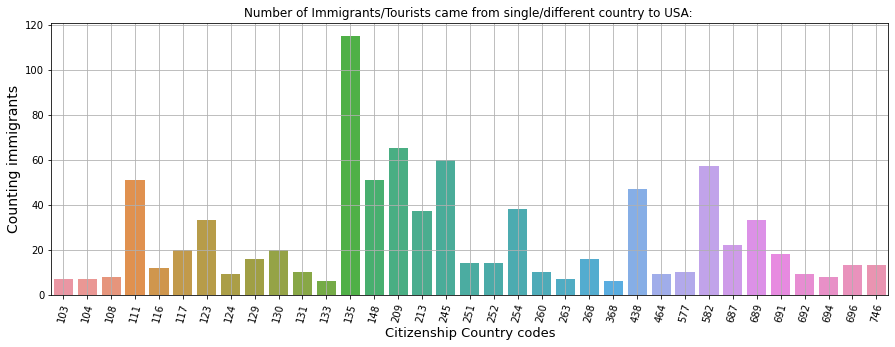

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(x="Citizenship_Country", y="count", data=Total_Immigrants_By_Country)
plt.fontsize=16
plt.xlabel("Citizenship Country codes", fontsize=13)
plt.ylabel("Counting immigrants", fontsize=14)

plt.xticks(rotation=75)
plt.grid(True)
plt.title("Number of Immigrants/Tourists came from single/different country to USA: ")

In [37]:
# inividuals id, country of citizenship & residency with type of visa count
#Individual_Visa_Type = Individual_Immigrants_Records.groupBy(['Entry_Num','citizenship_country', 'visa_type']).count()\
#                                 .orderBy('citizenship_country', ascending=True)
#Individual_Visa_Type.toPandas().head(10)

###   `Im3` -  `Travel_mode` Table redefined

### `Quick Query 03: `
> Identifying what mode of transportation immigrants used while entering USA?

In [38]:
Modes_of_Travel = Immigration_fact.select(['Immigration_Id','Immigrants_Age','Citizenship_Country', 'Current_State', 'Travel_Mode', 'Visa_Type','Admission_Num']).distinct() 
Modes_of_Travel.show(5)

+--------------+--------------+-------------------+-------------+-----------+---------+-------------+
|Immigration_Id|Immigrants_Age|Citizenship_Country|Current_State|Travel_Mode|Visa_Type|Admission_Num|
+--------------+--------------+-------------------+-------------+-----------+---------+-------------+
|       5471104|            77|                207|           WA|          1|       WT|  59501614433|
|       4291831|            30|                135|           UN|          1|       WT|  59119796133|
|       2323011|            56|                130|           NY|          1|       WT|  56085990733|
|       2865787|            69|                691|           NV|          1|       B1|  93573550730|
|       1214788|            51|                245|           NC|          1|       B2|  92949645330|
+--------------+--------------+-------------------+-------------+-----------+---------+-------------+
only showing top 5 rows



In [39]:
# which mode of transporation was most widely used?
Modes_of_Travel_Count = Immigration_fact.groupBy(['Travel_Mode']).count().orderBy('count', ascending=False)
Modes_of_Travel_Count.show()

+-----------+-----+
|Travel_Mode|count|
+-----------+-----+
|          1|  962|
|          3|   26|
|          2|   10|
|          9|    2|
+-----------+-----+



In [40]:
#print("Categorizing immigrants choice of travelling means: ")

#Mode_of_Travel = [(1, 'Air'),
#                  (2, 'Sea'),
#                  (3, 'Land'),
#                  (9, 'Not Reported')]

#columns=['Travel_Mode', 'Travel_Means']

#Mode_of_Travel = spark.createDataFrame(Mode_of_Travel, columns)
#Mode_of_Travel.show()

`NOTE: `We can see that `Travel_Mode:` 1 has the highest number following 3rd, then 2nd choice of transportation. At this point, we don't know what are the means of transportation chosen by the immigrants. So I'll decode these modes to an intelligible format by assigning label definition from the `SAS-Level` dataset.

In [41]:
print("Categorizing immigrants choice of travelling means: ")

Modes_of_Travel = Modes_of_Travel.withColumn("Means_of_Travel", \
                   when((Modes_of_Travel.Travel_Mode == 1), lit("Air")) \
                     .when((Modes_of_Travel.Travel_Mode == 2), lit("Sea")) \
                        .when((Modes_of_Travel.Travel_Mode == 3), lit("Land")) \
                          .when((Modes_of_Travel.Travel_Mode == 9), lit("Not Reported")))

Modes_of_Travel.toPandas().head(7)

Categorizing immigrants choice of travelling means: 


,Immigration_Id,Immigrants_Age,Citizenship_Country,Current_State,Travel_Mode,Visa_Type,Admission_Num,Means_of_Travel
0,5471104,77,207,WA,1,WT,59501614433,Air
1,4291831,30,135,UN,1,WT,59119796133,Air
2,2323011,56,130,NY,1,WT,56085990733,Air
3,2865787,69,691,NV,1,B1,93573550730,Air
4,1214788,51,245,NC,1,B2,92949645330,Air
5,5454506,34,135,CA,1,WT,59503013233,Air
6,4560971,51,464,CA,1,WT,59195893233,Air


In [42]:
print("Most widely used Modes of Travel was by plane: " + \
                     str(Modes_of_Travel.where(Modes_of_Travel.Means_of_Travel == 'Air').count()))

Most widely used Modes of Travel was by plane: 962


In [43]:
print("Land based traveling modes were insignificant: " + \
                     str(Modes_of_Travel.where(Modes_of_Travel.Means_of_Travel == 'Land').count()))

Land based traveling modes were insignificant: 26


In [44]:
print("Sea based traveling modes were lowest: " + \
                     str(Modes_of_Travel.where(Modes_of_Travel.Means_of_Travel == 'Sea').count()))

Sea based traveling modes were lowest: 10


`Note: ` Obviously above 96% of the immigrants/tourists entered into the country by plane

### `Quick Query 04: `
> Is there any correlation between visa type & means of transportation choice?

In [45]:
Visa_Travel_Mode = Modes_of_Travel.groupBy('Visa_Type','Means_of_Travel').\
                     agg(count('Immigration_Id').alias("Number_of_Immigrants"))
Visa_Travel_Mode.show(7)                                                                           

+---------+---------------+--------------------+
|Visa_Type|Means_of_Travel|Number_of_Immigrants|
+---------+---------------+--------------------+
|       F1|            Air|                   9|
|       B1|            Sea|                   1|
|       B2|            Sea|                   2|
|       WT|           Land|                  12|
|       CP|            Air|                   5|
|       F2|            Air|                   3|
|       WT|            Sea|                   7|
+---------+---------------+--------------------+
only showing top 7 rows



Text(0.5, 1.0, 'Visa Type & Mode of Travel chosen by Immigrants/Tourtists to USA')

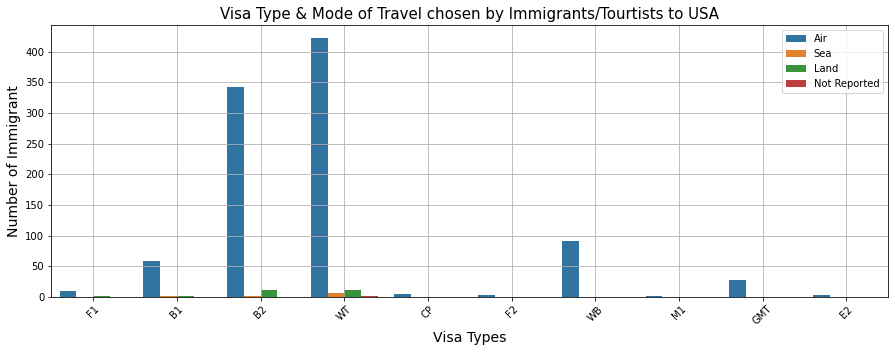

In [46]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
Visa_Travel_Mode  = Visa_Travel_Mode.toPandas()

ax = sns.barplot(x="Visa_Type", y="Number_of_Immigrants", hue="Means_of_Travel", data=Visa_Travel_Mode )

plt.xlabel("Visa Types", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Number of Immigrant", fontsize=14)

plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.title("Visa Type & Mode of Travel chosen by Immigrants/Tourtists to USA", fontsize=15)

`Findings: ` Only with `WT` & `B2` visa type people used all sorts of available transportation mode.

### `Quick Query 05 & 06: `
> Finding how many different ways immigrants/tourists travelled into California & Florida.

In [47]:
print("Showing how many different ways immigrants came into a single State (California): ")
Modes_of_Travel.select('Current_State', 'Means_of_Travel').where(Modes_of_Travel.Current_State =='CA').\
                                 groupBy('Means_of_Travel').count().show()

Showing how many different ways immigrants came into a single State (California): 
+---------------+-----+
|Means_of_Travel|count|
+---------------+-----+
|           Land|    4|
|            Air|  159|
+---------------+-----+



In [48]:
print("Showing how many different ways immigrants came into a single State (Florida): ")
Modes_of_Travel.select(['Current_State', 'Means_of_Travel']).where(Modes_of_Travel.Current_State =='FL').\
                                 groupBy('Means_of_Travel').count().show()

Showing how many different ways immigrants came into a single State (Florida): 
+---------------+-----+
|Means_of_Travel|count|
+---------------+-----+
|           Land|    1|
|            Air|  187|
+---------------+-----+



###  `im4` -  `Visa_Code` table redefined

+ Visa_Code is defined in a coded form, to make it more intelligible I decided to assign the intended purpose of the Visa issuance from the 'SAS Label Dataset'. We can see that this transformation has an analytical value to pursue.

In [49]:
# Visa_type_code = [(1, 'Business'),
#                  (2, 'Pleasure'),
#                  (3, 'Student')]

# columns=['Visa_CodeImmigration_fact', 'Visa_Category']

# Visa_Type_df = spark.createDataFrame(Visa_type_code, columns)
# Visa_Type_df.show()

In [50]:
# Available visa code type
Visa_Category_Type = Immigration_fact.select(['Immigration_Id','Immigrants_Age','Citizenship_Country', 'Current_State', 'Residency_Country','Visa_Code']).distinct() 
Visa_Category_Type.toPandas().head(5)

,Immigration_Id,Immigrants_Age,Citizenship_Country,Current_State,Residency_Country,Visa_Code
0,1421234,50,263,NY,263,2
1,1553590,72,692,FL,692,2
2,5484369,36,209,TN,209,2
3,652881,21,131,TX,131,2
4,3108923,38,129,NY,129,1


In [51]:
print("Visa Code Purpose redefined: ")
Visa_Category_Type = Visa_Category_Type.withColumn("Visa_Purpose", \
                   when((Visa_Category_Type.Visa_Code == 1), lit("Business")) \
                     .when((Visa_Category_Type.Visa_Code == 2), lit("Pleasure")) \
                        .when((Visa_Category_Type.Visa_Code == 3), lit("Student"))) 

Visa_Category_Type.toPandas().head(7)

Visa Code Purpose redefined: 


,Immigration_Id,Immigrants_Age,Citizenship_Country,Current_State,Residency_Country,Visa_Code,Visa_Purpose
0,1421234,50,263,NY,263,2,Pleasure
1,1553590,72,692,FL,692,2,Pleasure
2,5484369,36,209,TN,209,2,Pleasure
3,652881,21,131,TX,131,2,Pleasure
4,3108923,38,129,NY,129,1,Business
5,5246711,4,148,NY,112,2,Pleasure
6,2572618,38,528,FL,528,2,Pleasure


### `Quick Query 07 & 08: `

In [52]:
print("Total count of Reasons for travelling in USA by immigrants: ")
Visa_Category_Type.select(['Current_State', 'Visa_Purpose']).groupBy('Visa_Purpose').count().show()

Total count of Reasons for travelling in USA by immigrants: 
+------------+-----+
|Visa_Purpose|count|
+------------+-----+
|    Pleasure|  831|
|     Student|   14|
|    Business|  155|
+------------+-----+



In [53]:
# To make sure we're not losing any data rows from this join
#Visa_Category_Type.dropDuplicates(['Immigration_Id']).select('Immigration_Id').count()

In [54]:
Reason_for_Travel = Visa_Category_Type.groupBy(['Current_State','Visa_Purpose',]).count().orderBy('count', ascending=False)
Reason_for_Travel.show(7)

+-------------+------------+-----+
|Current_State|Visa_Purpose|count|
+-------------+------------+-----+
|           FL|    Pleasure|  176|
|           NY|    Pleasure|  148|
|           CA|    Pleasure|  126|
|         null|    Pleasure|   53|
|           HI|    Pleasure|   51|
|           CA|    Business|   33|
|           TX|    Pleasure|   29|
+-------------+------------+-----+
only showing top 7 rows



Text(0.5, 1.0, 'Purpose of immigrants visit to different State')

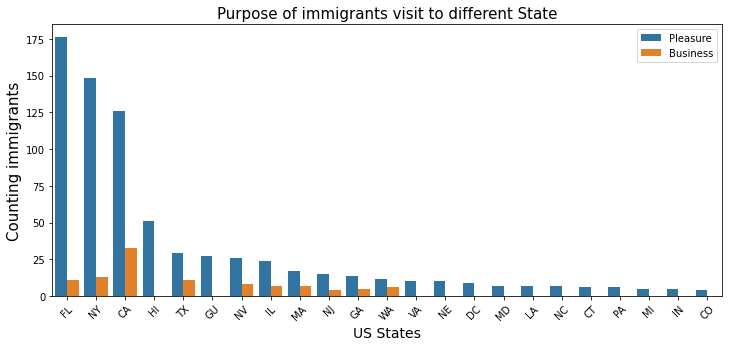

In [55]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 5))

Reason_for_Travel = Reason_for_Travel.toPandas()
Reason_for_Travel = Reason_for_Travel[:35]

ax = sns.barplot(x="Current_State", y="count", hue="Visa_Purpose", data=Reason_for_Travel)
plt.xticks(rotation=45)
plt.xlabel("US States", fontsize=14)
plt.ylabel("Counting immigrants", fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.title("Purpose of immigrants visit to different State", fontsize=15)

In [56]:
#Visa_Category_Type.filter(Visa_Category_Type.Visa_Category.isin('Pleasure')).count()

### `Quick Query 09 & 10: `
+ Counting what purpose drove people to a single US State? For instance CA, NY..

In [57]:
# Finding why people visited to state of California
Visa_Category_Type.select(['Current_State', 'Visa_Purpose']).where(Visa_Category_Type.Current_State =='CA').\
                                 groupBy('Visa_Purpose').count().show()

+------------+-----+
|Visa_Purpose|count|
+------------+-----+
|    Pleasure|  126|
|     Student|    4|
|    Business|   33|
+------------+-----+



In [58]:
# finding why immigrants visited state of New York
Visa_Category_Type.select(['Current_State', 'Visa_Purpose']).where(Visa_Category_Type.Current_State =='GA').\
                                 groupBy('Visa_Purpose').count().show()

+------------+-----+
|Visa_Purpose|count|
+------------+-----+
|    Pleasure|   14|
|    Business|    5|
+------------+-----+



`Findings: ` Immigrants mostly visited to US States for pleasure mostly.

### `Im5` -  Associating `Visa category types` and `Travel mode` table:
+ We can comprehend that these newly formed columns (`Means_of_Travel` & `Visa_Purpose`) has significant analytical values for our data model. I decided to combine them to make a table feasible for analysis.

In [59]:
# This join will eliminate duplicated columns from both and a single column
Mode_Visa_Category = Modes_of_Travel.join(Visa_Category_Type, ["Immigration_Id", "Citizenship_Country",'Immigrants_Age'], how="inner").\
                           drop(Visa_Category_Type["Current_State"])                                                    

Mode_Visa_Category.toPandas().head(3)

,Immigration_Id,Citizenship_Country,Immigrants_Age,Travel_Mode,Visa_Type,Admission_Num,Means_of_Travel,Current_State,Residency_Country,Visa_Code,Visa_Purpose
0,5471104,207,77,1,WT,59501614433,Air,WA,207,2,Pleasure
1,4291831,135,30,1,WT,59119796133,Air,UN,135,2,Pleasure
2,2323011,130,56,1,WT,56085990733,Air,NY,130,2,Pleasure


In [60]:
Mode_Visa_Category.dtypes

[('Immigration_Id', 'int'),
 ('Citizenship_Country', 'int'),
 ('Immigrants_Age', 'int'),
 ('Travel_Mode', 'int'),
 ('Visa_Type', 'string'),
 ('Admission_Num', 'bigint'),
 ('Means_of_Travel', 'string'),
 ('Current_State', 'string'),
 ('Residency_Country', 'int'),
 ('Visa_Code', 'int'),
 ('Visa_Purpose', 'string')]

### `Im6` - Final `Immigration_fact_table` 
> The purpose here is to create a final version of fact table, which will represent all the dimension table with foreign-key infused in it. On this progression I did..
+ Join table(`Mode_Visa_Category`) with `Immigration_fact` table.
+ This join will create a clean, comprehensive & intelligible immigration data set ready to analyze. 
+ I used a `Left-Join` to get a complete Fact-Immigration Table without losing any row values.

In [61]:
# This join will eliminate repeated columns
Fact_Immigration = Immigration_fact.join(Mode_Visa_Category, ['Immigration_Id', 'Admission_Num','Immigrants_Age','Citizenship_Country',\
                            'Residency_Country', 'Current_State', 'Visa_Type','Visa_Code', 'Travel_Mode'], how="left")

# dropping unnecessary or unintelligible columns
Fact_Immigration = Fact_Immigration.drop('Visa_Code','Travel_Mode')

Fact_Immigration.toPandas().head(3)

,Immigration_Id,Admission_Num,Immigrants_Age,Citizenship_Country,Residency_Country,Current_State,Visa_Type,Immigration_Year,Immigration_Month,Port_Code,Arrival_Date,Departure_Date,Match_Flag,Birth_Year,Gender,Airline_Code,Flight_Num,Means_of_Travel,Visa_Purpose
0,81344,92485502130,45,263,263,TN,B2,2016,4,FTL,2016-04-01,2016-04-06,M,1971,F,QR,00707,Air,Pleasure
1,1186211,55781134933,46,135,135,FL,WT,2016,4,ORL,2016-04-07,2016-04-19,M,1970,M,VS,00015,Air,Pleasure
2,1215382,92993709530,42,245,245,CA,B1,2016,4,PHO,2016-04-07,2016-04-25,M,1974,M,DL,00186,Air,Business


In [62]:
# To make sure we're not losing any data rows from this join
print("Final Fact table (Fact_Immigration) dimension: ")
print("Number of rows: " + str(Fact_Immigration.count()) + " \nNumber of columns: " + str(len(Fact_Immigration.columns)))

Final Fact table (Fact_Immigration) dimension: 
Number of rows: 1000 
Number of columns: 19


In [63]:
Fact_Immigration.dtypes

[('Immigration_Id', 'int'),
 ('Admission_Num', 'bigint'),
 ('Immigrants_Age', 'int'),
 ('Citizenship_Country', 'int'),
 ('Residency_Country', 'int'),
 ('Current_State', 'string'),
 ('Visa_Type', 'string'),
 ('Immigration_Year', 'int'),
 ('Immigration_Month', 'int'),
 ('Port_Code', 'string'),
 ('Arrival_Date', 'date'),
 ('Departure_Date', 'date'),
 ('Match_Flag', 'string'),
 ('Birth_Year', 'int'),
 ('Gender', 'string'),
 ('Airline_Code', 'string'),
 ('Flight_Num', 'string'),
 ('Means_of_Travel', 'string'),
 ('Visa_Purpose', 'string')]

> Sending Fact_Immigration_Inclusive table to workspace cloud?

In [64]:
#output_data = 'C:/Users/paralax11/Desktop/Data_Engineering_Udacity_21/CAPSTONE_PROJECT/PROJECT_CAPSTONE_FILES/Results2/'
#Fact_Immigration_Inclusive.write.mode("overwrite").format("csv").save(output_data + "immigration/")
#Fact_Immigration_Inclusive.write.mode("overwrite")\
#                   .parquet(path=output_data + 'Fact_Immigration_Inclusive/')

In [65]:
#Fact_Immigration_Inclusive.write.mode("overwrite")\
                  # .parquet(path=output_data + 'Fact_Immigration_Inclusive/')

###  `Im7` - Dimension table `02`

#### `Dated transformation` of `arrival-departure` columns:

> If we want to know the most intricate detail about an immigrants overall staying status in this country, we need a dated analysis which in turns will project a clear view of the incoming immigrants travelling status. So I decided to create a detail dated table for the immigrants arrival and departure status in a data-driven segmented form. We can see the immense possibility of date-segmented analysis of immigration data.

In [66]:
# creating a quick temporary view of immigration table
Fact_Immigration.createOrReplaceTempView("Immigration_Time_Line")

In [67]:
# selecting columns with changed data type and deconstucting both arrival and departure date columns
Dated_Arrival_Departure = spark.sql('''
                     Select Admission_Num,\
                             Arrival_Date AS Entry_Date,\
                             Citizenship_Country, \
                             int(date_format(date(Arrival_Date),'yyyy')) Arrival_Year,\
                             date_format(date(Arrival_Date),'MMMM') Arrival_Month,\
                             int(date_format(date(Arrival_Date),'dd')) Arrival_Day,\
                             departure_date AS Departure_Date, \
                             int(date_format(date(Departure_Date),'yyyy')) Depart_Year,\
                             date_format(date(Departure_Date),'MMMM') Depart_Month,\
                             int(date_format(date(Departure_Date),'dd')) Depart_Day, \
                             Visa_Type, Port_Code
                      From Immigration_Time_Line
                      WHERE year(Arrival_Date) >= 2016               
                  ''')

Dated_Arrival_Departure.toPandas().head(4)

,Admission_Num,Entry_Date,Citizenship_Country,Arrival_Year,Arrival_Month,Arrival_Day,Departure_Date,Depart_Year,Depart_Month,Depart_Day,Visa_Type,Port_Code
0,92485502130,2016-04-01,263,2016,April,1,2016-04-06,2016.0,April,6.0,B2,FTL
1,55781134933,2016-04-07,135,2016,April,7,2016-04-19,2016.0,April,19.0,WT,ORL
2,92993709530,2016-04-07,245,2016,April,7,2016-04-25,2016.0,April,25.0,B1,PHO
3,56155874633,2016-04-14,135,2016,April,14,2016-04-23,2016.0,April,23.0,WB,LVG


In [68]:
Dated_Arrival_Departure.dtypes

[('Admission_Num', 'bigint'),
 ('Entry_Date', 'date'),
 ('Citizenship_Country', 'int'),
 ('Arrival_Year', 'int'),
 ('Arrival_Month', 'string'),
 ('Arrival_Day', 'int'),
 ('Departure_Date', 'date'),
 ('Depart_Year', 'int'),
 ('Depart_Month', 'string'),
 ('Depart_Day', 'int'),
 ('Visa_Type', 'string'),
 ('Port_Code', 'string')]

### `Quick Query 11: `

In [69]:
print("Number of people who didn't leave the country in the year 2016: ")
Dated_Arrival_Departure.select(year("Departure_Date").alias("Depart_Year")).groupBy("Depart_Year").count().toPandas()

Number of people who didn't leave the country in the year 2016: 


,Depart_Year,count
0,NaN,49
1,2016.0,951


In [70]:
# After redefined column values
Dated_Arrival_Departure.dtypes

[('Admission_Num', 'bigint'),
 ('Entry_Date', 'date'),
 ('Citizenship_Country', 'int'),
 ('Arrival_Year', 'int'),
 ('Arrival_Month', 'string'),
 ('Arrival_Day', 'int'),
 ('Departure_Date', 'date'),
 ('Depart_Year', 'int'),
 ('Depart_Month', 'string'),
 ('Depart_Day', 'int'),
 ('Visa_Type', 'string'),
 ('Port_Code', 'string')]

In [71]:
# To make sure that we're not losing rows of data
# Dated_Arrival_Departure.count()

### `Quick Query 12, 13 & 14: `

> `12:` How many `Days in Total` an immigrants stayed in USA?

In [72]:
# calculating how many days an immigrants spent in USA before leaving the country 
Avg_Staying_Days = Dated_Arrival_Departure.withColumn("Days_of_Staying", datediff(col("Departure_Date"),col("Entry_Date")))
Avg_Staying_Days.toPandas().head(7)

,Admission_Num,Entry_Date,Citizenship_Country,Arrival_Year,Arrival_Month,Arrival_Day,Departure_Date,Depart_Year,Depart_Month,Depart_Day,Visa_Type,Port_Code,Days_of_Staying
0,92485502130,2016-04-01,263,2016,April,1,2016-04-06,2016.0,April,6.0,B2,FTL,5.0
1,55781134933,2016-04-07,135,2016,April,7,2016-04-19,2016.0,April,19.0,WT,ORL,12.0
2,92993709530,2016-04-07,245,2016,April,7,2016-04-25,2016.0,April,25.0,B1,PHO,18.0
3,56155874633,2016-04-14,135,2016,April,14,2016-04-23,2016.0,April,23.0,WB,LVG,9.0
4,93697932230,2016-04-16,245,2016,April,16,2016-07-15,2016.0,July,15.0,B2,FMY,90.0
5,818682485,2016-04-18,691,2016,April,18,2016-04-19,2016.0,April,19.0,B2,LOS,1.0
6,59369087333,2016-04-27,209,2016,April,27,2016-05-02,2016.0,May,2.0,WT,LOS,5.0


> `13:` Finding `Residency country codes` of those immigrants who `stayed more than 15 days` in USA

In [73]:
# country code of immigrants who stayed more than 17 days
Staying_Days_Country = Avg_Staying_Days.groupBy("Citizenship_Country").agg(avg("Days_of_Staying").alias("Staying_Days")).\
                         filter(col('Staying_Days') >= 15).sort(col('Staying_Days').desc())
#.orderBy(col("Staying_Days").desc())

Staying_Days_Country.show(7)

+-------------------+------------+
|Citizenship_Country|Staying_Days|
+-------------------+------------+
|                525|        98.0|
|                258|        84.0|
|                350|        82.0|
|                272|        74.0|
|                520|        57.0|
|                586|        49.5|
|                692|      47.125|
+-------------------+------------+
only showing top 7 rows



In [74]:
print("Number of country people stayed more than 15 days: "  + str(Staying_Days_Country.count()))

Number of country people stayed more than 15 days: 37


Text(0.5, 1.0, 'Number of days Immigrants/Tourists stayed in USA: ')

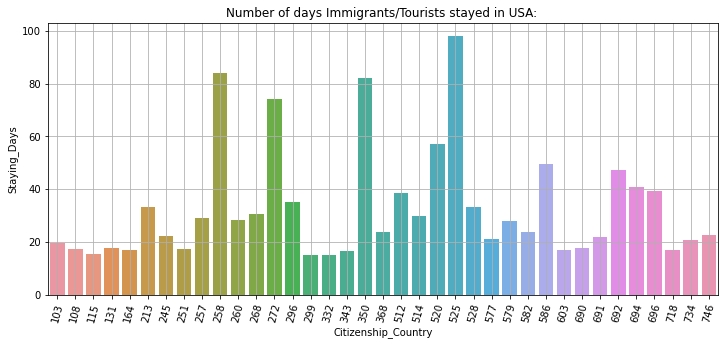

In [75]:
Staying_Days_Country = Staying_Days_Country.toPandas()
Staying_Days_Country = Staying_Days_Country[:37]

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.barplot(x="Citizenship_Country", y="Staying_Days", data=Staying_Days_Country)
plt.fontsize=16
plt.xticks(rotation=75)
plt.grid(True)
plt.title("Number of days Immigrants/Tourists stayed in USA: ")

`14:` Immigrants average staying days in USA?

In [76]:
print("In average an immigrant stays in USA: 15 days apprx. \n")
Avg_Staying_Days.agg(round(avg("Days_of_Staying"),3)).show()

In average an immigrant stays in USA: 15 days apprx. 

+------------------------------+
|round(avg(Days_of_Staying), 3)|
+------------------------------+
|                        15.362|
+------------------------------+



### `Quick Query 15 & 16:` 
+ `15:` Individual immigrants staying on `types of visa`, `purpose of staying` and `total days` of staying in USA

In [77]:
Visa_N_Days_Stay = Avg_Staying_Days.join(Mode_Visa_Category, (Avg_Staying_Days.Admission_Num == Mode_Visa_Category.Admission_Num)\
                                ,how="inner").drop(Mode_Visa_Category["Visa_Type"]) .select('Immigration_Id','Visa_Type','Visa_Purpose','Days_of_Staying')
Visa_N_Days_Stay.show(3)

+--------------+---------+------------+---------------+
|Immigration_Id|Visa_Type|Visa_Purpose|Days_of_Staying|
+--------------+---------+------------+---------------+
|        879820|       WT|    Pleasure|             12|
|       2346741|       WT|    Pleasure|              4|
|        514906|       B1|    Business|              9|
+--------------+---------+------------+---------------+
only showing top 3 rows



+ `16:` In total `how many immigrants/tourist` visited on `what types of visa`, `visting purposes` & `total staying days.` count

In [78]:
Visa_Purpose_Stay = Visa_N_Days_Stay.groupBy('Visa_Type', 'Visa_Purpose').agg(count('Immigration_Id').alias("Number_of_Immigrants"),\
                                       sum('Days_of_Staying').alias('Staying_Days')).\
                                        sort(col('Staying_Days').desc())
Visa_Purpose_Stay .show()

+---------+------------+--------------------+------------+
|Visa_Type|Visa_Purpose|Number_of_Immigrants|Staying_Days|
+---------+------------+--------------------+------------+
|       B2|    Pleasure|                 356|        7649|
|       WT|    Pleasure|                 443|        4592|
|       B1|    Business|                  61|         804|
|       WB|    Business|                  91|         721|
|       F1|     Student|                  10|         543|
|       E2|    Business|                   3|         159|
|      GMT|    Pleasure|                  27|         123|
|       CP|    Pleasure|                   5|          18|
|       M1|     Student|                   1|        null|
|       F2|     Student|                   3|        null|
+---------+------------+--------------------+------------+



Text(0.5, 1.0, 'Visa types & Number of days staying with purpose')

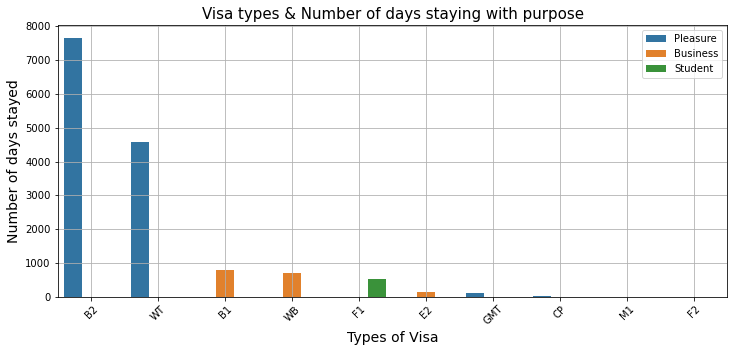

In [79]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 5))
Visa_Purpose_Stay  = Visa_Purpose_Stay.toPandas()

ax = sns.barplot(x="Visa_Type", y="Staying_Days", hue='Visa_Purpose',  data=Visa_Purpose_Stay )
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel("Types of Visa", fontsize=14)
plt.ylabel("Number of days stayed", fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.title("Visa types & Number of days staying with purpose", fontsize=15)

## `Data quality checks: `

In [80]:
print("The Fact_Immigration table: ") 
record_count(Fact_Immigration)

The Fact_Immigration table: 
is not empty, it has total 1000 records.


### setting output path

In [81]:
# write fact_immigration table to parquet files partitioned by state and city
#Fact_Immigration.write.mode("overwrite").partitionBy('residency_country_code').parquet(path=output_data + 'Fact_Immigration/')

> ### Reading `I94_SAS_Labels_Descriptions` file

Immigration data set came with lot of coded columns and in apparent observation the significance of those columns( `I94YR, i94cntyl, i94prtl, I94MODE, I94ADDR & I9visa`) are not intelligible. To decode those coded columns we're given a label file which is in `SAS data format`. Here I'd be slicing, correlating and connecting those coded values to add meaning on to our decoded column vlaues. This processes of decoding is a rather tedious endeavour. Let's start the journey.

In [82]:
# Opening the SAS label file
with open("I94_SAS_Labels_Descriptions.SAS") as f:
    Label_Contents = f.readlines()

In [83]:
# quick view of what value is included inside the file
Label_Contents

["libname library 'Your file location' ;\n",
 'proc format library=library ;\n',
 '\n',
 '/* I94YR - 4 digit year */\n',
 '\n',
 '/* I94MON - Numeric month */\n',
 '\n',
 '/* I94CIT & I94RES - This format shows all the valid and invalid codes for processing */\n',
 '  value i94cntyl\n',
 "   582 =  'MEXICO Air Sea, and Not Reported (I-94, no land arrivals)'\n",
 "   236 =  'AFGHANISTAN'\n",
 "   101 =  'ALBANIA'\n",
 "   316 =  'ALGERIA'\n",
 "   102 =  'ANDORRA'\n",
 "   324 =  'ANGOLA'\n",
 "   529 =  'ANGUILLA'\n",
 "   518 =  'ANTIGUA-BARBUDA'\n",
 "   687 =  'ARGENTINA '\n",
 "   151 =  'ARMENIA'\n",
 "   532 =  'ARUBA'\n",
 "   438 =  'AUSTRALIA'\n",
 "   103 =  'AUSTRIA'\n",
 "   152 =  'AZERBAIJAN'\n",
 "   512 =  'BAHAMAS'\n",
 "   298 =  'BAHRAIN'\n",
 "   274 =  'BANGLADESH'\n",
 "   513 =  'BARBADOS'\n",
 "   104 =  'BELGIUM'\n",
 "   581 =  'BELIZE'\n",
 "   386 =  'BENIN'\n",
 "   509 =  'BERMUDA'\n",
 "   153 =  'BELARUS'\n",
 "   242 =  'BHUTAN'\n",
 "   688 =  'BOLIVIA

### `L1` - Splitting ` Port`, `City` and `State` codes

+ The codes with this label file were entangled with `inordinate amount of regular expressions` embedded with them. So I had to do step by step coding to clear out all the regex clutter from the label file to make them intelligible and usable with our fact and dimension tables.

+ To narrow the scope of our analysis, I've decided to select codes `relevant only to USA cities` and ports. On this selection processes I sliced out unnecessary rows.

+ The number of port information available outside US is very limited and not relevant to our immigration data analysis.

In [84]:
# selecting rows only information with US city & port codes
Label_Contents = [ports.strip() for ports in Label_Contents]
Port_locations = Label_Contents[302:894]
Splitted_ports = [port.split("=") for port in Port_locations]
pd.DataFrame(Splitted_ports).head(3)

,0,1
0,'ALC'\t,"\t'ALCAN, AK '"
1,'ANC'\t,"\t'ANCHORAGE, AK '"
2,'BAR'\t,"\t'BAKER AAF - BAKER ISLAND, AK'"


In [85]:
# quick show of what we've selected
pd.DataFrame(Splitted_ports, columns=['Port_Codes', 'City_State_Codes']).head(3)

,Port_Codes,City_State_Codes
0,'ALC'\t,"\t'ALCAN, AK '"
1,'ANC'\t,"\t'ANCHORAGE, AK '"
2,'BAR'\t,"\t'BAKER AAF - BAKER ISLAND, AK'"


In [86]:
# separating first part of ports as ports code
Port_codes = [ports[0].replace("'","").strip() for ports in Splitted_ports]
pd.DataFrame(Port_codes, columns=['Port_Codes']).head(3)

,Port_Codes
0,ALC
1,ANC
2,BAR


In [87]:
# separating city_state codes
Port_locations = [ports[1].replace("''", "").strip() for ports in Splitted_ports]
pd.DataFrame(Port_locations, columns=['City_State_Codes']).head(3)

,City_State_Codes
0,"'ALCAN, AK '"
1,"'ANCHORAGE, AK '"
2,"'BAKER AAF - BAKER ISLAND, AK'"


In [88]:
# remove and replacing all inverted commas
Port_locations = [ports[1].replace("'","").strip() for ports in Splitted_ports]
pd.DataFrame(Port_locations, columns=['City_State_Codes']).head(3)

,City_State_Codes
0,"ALCAN, AK"
1,"ANCHORAGE, AK"
2,"BAKER AAF - BAKER ISLAND, AK"


In [89]:
# split and separate city only
Port_cities = [ports.split(",")[0] for ports in Port_locations]

pd.DataFrame(Port_cities ,columns=['Port_City']).head(3)

,Port_City
0,ALCAN
1,ANCHORAGE
2,BAKER AAF - BAKER ISLAND


In [90]:
# split only the state codes
Port_states = [ports.split(",")[-1] for ports in Port_locations]
pd.DataFrame(Port_states, columns=['Port_State']).head(3)

,Port_State
0,AK
1,AK
2,AK


In [91]:
# a combined view of all the separated columns from regular expressions
Port_locations_df = pd.DataFrame({"Port_Code" : Port_codes, "Port_City": Port_cities, "Port_State": Port_states})
Port_locations_df.head(3)

,Port_Code,Port_City,Port_State
0,ALC,ALCAN,AK
1,ANC,ANCHORAGE,AK
2,BAR,BAKER AAF - BAKER ISLAND,AK


In [92]:
#Port_locations_df = spark.createDataFrame(Port_locations_df)

> Sending this `Port_locations_df` file as a dimension table with` parquet-file-format` into the cloud

In [93]:
# 1. Port_locations_df.write.mode("overwrite")\
#                               .parquet(path=output_data + 'Port_locations_df/')

# 2.spark.createDataFrame(Port_locations_df.items(), ['Port_Code', 'Port_City', 'Port_State'])\
#                         .write.mode("overwrite")\
#                         .parquet(path=output_data + 'Port_locations_df')

In [94]:
# counting number of available values
Port_locations_df.count()

Port_Code     592
Port_City     592
Port_State    592
dtype: int64

In [95]:
Port_locations_df.dtypes

Port_Code     object
Port_City     object
Port_State    object
dtype: object

### `Quick Query 17: `

`17:` How many ports are on each State and the order(hight > low) are there by each State?

In [96]:
Port_locations_df.groupby(['Port_State']).agg({'Port_Code':'count' }).head()

,Port_Code
Port_State,
AK,22
AL,3
AR,2
AR (BPS),1
ARGENTINA,1


In [97]:
# counting number of ports by each state in high to low order
Port_locations_df.groupby(['Port_State']).agg({'Port_City':'count' })\
                     .sort_values(by='Port_City', ascending=False).head(5)

,Port_City
Port_State,
TX,47
NY,34
WA,30
FL,29
CA,26


In [98]:
#df_port_locations.groupby(['Port_State', 'Port_City']).apply(lambda x: x['Port_City'].count()).head(5)

In [99]:
#Port_locations_df.groupby('Port_State').agg(count('Port_Code').alias('Number_of_Ports')).\
#                                       sort(col('Number_of_Ports').desc())

### `Quick Query 18: `

In [100]:
print("Finding Distinct number of Port, City and State count: ")
Port_locations_df = spark.createDataFrame(Port_locations_df)
Port_locations_df.createOrReplaceTempView("Port_City_df")

Total_City_Port_State = spark.sql("SELECT count(distinct Port_Code) AS Total_Ports, \
                                       count(distinct Port_City) AS Total_City, \
                                         count(distinct Port_State) AS Distinct_State \
                                            FROM Port_City_df").show() 

Finding Distinct number of Port, City and State count: 
+-----------+----------+--------------+
|Total_Ports|Total_City|Distinct_State|
+-----------+----------+--------------+
|        592|       567|           111|
+-----------+----------+--------------+



In [101]:
#for x in Label_Contents:
#    ports = Label_Contents[302:962]
#    splitted_ports = ports.split("=")
#    port_codes = splitted_ports[0].replace("'","").strip() 
#    port_locations = splitted_ports[1].replace("'","").strip()
#    port_cities = port_locations.split(",")[0] 
#    port_states = port_locations.split(",")[-1] 
#    df_port_locations = pd.DataFrame({"port_code" : port_codes, "port_city": port_cities, "port_state": port_states})
#    df_port_locations.head(20)
    

### `L2` - `Country Codes` and `Names:` 

> The county column `(i94cntyl)` with immigration table is coded with integers. Here I'll decode them to `country names` from the given SAS Label file. This conversion will give us country names, where the immigrants came from to USA.

In [102]:
# Stripping, Slicing and Splitting row values
Label_Contents = [country.strip() for country in Label_Contents]
Countries = Label_Contents[10:245]
Splitted_country = [country.split("=") for country in Countries]

# Replacing & Stripping regular expressions
Country_Code = [country[0].replace("'","").strip() for country in Splitted_country]
Country_Name = [country[1].replace("'","").strip() for country in Splitted_country]

In [103]:
# inplacing country codes and names in a data frame
Country_Codes_df = pd.DataFrame({"Country_Codes" : Country_Code, \
                                  "Country_Names": Country_Name})
Country_Codes_df.head(3)

,Country_Codes,Country_Names
0,236,AFGHANISTAN
1,101,ALBANIA
2,316,ALGERIA


In [104]:
# counting number of country
Country_Codes_df.count()

Country_Codes    235
Country_Names    235
dtype: int64

In [105]:
#Country_Codes_df = Country_Codes_df.drop(Country_Codes_df.index[235:])
Country_Codes_df.head(235)

,Country_Codes,Country_Names
0,236,AFGHANISTAN
1,101,ALBANIA
2,316,ALGERIA
3,102,ANDORRA
4,324,ANGOLA
...,...,...
230,216,YEMEN
231,139,YUGOSLAVIA
232,301,ZAIRE
233,344,ZAMBIA


In [106]:
Country_Codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country_Codes  235 non-null    object
 1   Country_Names  235 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [107]:
# I'm converting 'Country_Codes_df' to a spark data frame
Country_Codes_df = spark.createDataFrame(Country_Codes_df)

In [108]:
# casting "Country codes" into an "Integer Type" data
Country_Codes_df = Country_Codes_df.withColumn("Country_Codes", col("Country_Codes").cast(IntegerType()))
Country_Codes_df.printSchema()

root
 |-- Country_Codes: integer (nullable = true)
 |-- Country_Names: string (nullable = true)



In [109]:
Country_Codes_df.show(5)

+-------------+-------------+
|Country_Codes|Country_Names|
+-------------+-------------+
|          236|  AFGHANISTAN|
|          101|      ALBANIA|
|          316|      ALGERIA|
|          102|      ANDORRA|
|          324|       ANGOLA|
+-------------+-------------+
only showing top 5 rows



In [110]:
Country_Codes_df.agg({'Country_Codes': 'count', 'Country_Names':'count'}).head()

Row(count(Country_Names)=235, count(Country_Codes)=235)

In [111]:
print("Viewing country names from the country code: \n")
Country_Codes_df.groupBy('Country_Names').count().orderBy('count', ascending=True)
Country_Codes_df.show(235)

Viewing country names from the country code: 

+-------------+--------------------+
|Country_Codes|       Country_Names|
+-------------+--------------------+
|          236|         AFGHANISTAN|
|          101|             ALBANIA|
|          316|             ALGERIA|
|          102|             ANDORRA|
|          324|              ANGOLA|
|          529|            ANGUILLA|
|          518|     ANTIGUA-BARBUDA|
|          687|           ARGENTINA|
|          151|             ARMENIA|
|          532|               ARUBA|
|          438|           AUSTRALIA|
|          103|             AUSTRIA|
|          152|          AZERBAIJAN|
|          512|             BAHAMAS|
|          298|             BAHRAIN|
|          274|          BANGLADESH|
|          513|            BARBADOS|
|          104|             BELGIUM|
|          581|              BELIZE|
|          386|               BENIN|
|          509|             BERMUDA|
|          153|             BELARUS|
|          242|             

> Sending `Country_Codes_df` table as dimension table to the cloud

In [112]:
#spark.createDataFrame(Df_Country_Codes.items(), ['Country_Codes', 'Country_Names'])\
#         .write.mode("overwrite")\
#         .parquet(path=output_data + 'Df_Country_Codes/')

In [113]:
#output_data = 'C:/Users/paralax11/Desktop/Data_Engineering_Udacity_21/CAPSTONE_PROJECT/PROJECT_CAPSTONE_FILES/Country_Code_Files/'

##Country_Codes_df.write.mode("overwrite").format("csv").save(output_data + "Code_Country")
#Country_Codes_df.write.mode("overwrite")\
#                   .parquet(path=output_data + 'Country_Codes_df/')

In [114]:
# Country_Codes_df.write.parquet('C:/Users/paralax11/Desktop/Data_Engineering_Udacity_21/CAPSTONE_PROJECT/PROJECT_CAPSTONE_FILES/Country_Code_Files2/take.parquet')

### `Quick Query 19: `

Country codes gives us a clear understanding about the country name and immigrants purpose of visiting in USA.

+ `19.1:` While Immigrants/Tourists `Citizenship & Residence country` is the same.

In [115]:
print("Finding Immigrants Country of Origin and Residence: ")
Fact_Immigration.createOrReplaceTempView("Fact_Immigration")
Country_Codes_df.createOrReplaceTempView("Country_Codes_NAME")

Origin_of_Citizenship = spark.sql('''
                               SELECT DISTINCT ft.Immigration_Id, ft.Citizenship_Country, 
                               cc.Country_Names, ft.Visa_Type, ft.Residency_Country                        
                               FROM Fact_Immigration ft  
                               INNER JOIN Country_Codes_NAME AS cc
                               WHERE ft.Citizenship_Country == cc.Country_Codes
                                ''')
Origin_of_Citizenship.toPandas().head(7)

Finding Immigrants Country of Origin and Residence: 


,Immigration_Id,Citizenship_Country,Country_Names,Visa_Type,Residency_Country
0,1434452,516,TRINIDAD AND TOBAGO,B2,516
1,715185,516,TRINIDAD AND TOBAGO,B2,516
2,523239,516,TRINIDAD AND TOBAGO,B2,516
3,3371259,251,ISRAEL,B2,251
4,3898900,251,ISRAEL,B2,251
5,697792,251,ISRAEL,B2,251
6,2741251,251,ISRAEL,B2,251


+ `19.2:` While Immigrants came from a `different country` other than their `original citizenship country`.

In [116]:
print("Finding Immigrants Country of Origin and Residence: ")
Fact_Immigration.createOrReplaceTempView("Fact_Immigration")
Country_Codes_df.createOrReplaceTempView("Country_Codes_Names")

Citizenship_vs_Residency = spark.sql('''
                               SELECT DISTINCT ft.Immigration_Id, ft.Citizenship_Country, 
                               ft.Visa_Type, ft.Residency_Country                       
                               FROM Fact_Immigration AS ft                               
                               WHERE (ft.Citizenship_Country != ft.Residency_Country)
                                ''')
Citizenship_vs_Residency.toPandas().head(7)

Finding Immigrants Country of Origin and Residence: 


,Immigration_Id,Citizenship_Country,Visa_Type,Residency_Country
0,4299497,148,WT,112
1,232708,113,WT,135
2,3110964,129,WT,691
3,4668286,746,B2,158
4,862818,213,B2,117
5,5081809,254,WT,276
6,3503887,133,B2,264


In [117]:
print("Findings: Number of immigrants came to USA from a different country other than their original country of citizenship: " + 
                                              str(Citizenship_vs_Residency.count()))

Findings: Number of immigrants came to USA from a different country other than their original country of citizenship: 174


### `Quick Query 20: `
+ `20.1:` `Name of the countries` when an immigrant travelled from `different country`.

In [118]:
Citizenship_vs_Residency.createOrReplaceTempView("Residency_Citizenship")
Country_Codes_df.createOrReplaceTempView("Country_Names")

Citizens_vs_Residence_Country_Names = spark.sql('''
                               SELECT DISTINCT ft.Immigration_Id, ft.Citizenship_Country, 
                               cn.Country_Names AS Origin_Country,
                               ft.Visa_Type, 
                               ft.Residency_Country, cc.Country_Names AS Travel_Country                        
                               FROM Residency_Citizenship ft  
                               INNER JOIN Country_Names AS cn
                               ON ft.Citizenship_Country == cn.Country_Codes 
                               INNER JOIN Country_Names AS cc
                               ON ft.Residency_Country == cc.Country_Codes
                               WHERE (ft.Citizenship_Country != ft.Residency_Country)
                               ''')
Citizens_vs_Residence_Country_Names.toPandas().head(5)

,Immigration_Id,Citizenship_Country,Origin_Country,Visa_Type,Residency_Country,Travel_Country
0,1349112,108,DENMARK,WT,251,ISRAEL
1,2489526,111,FRANCE,WT,251,ISRAEL
2,2209939,332,MOROCCO,B2,296,UNITED ARAB EMIRATES
3,2048872,274,BANGLADESH,B1,296,UNITED ARAB EMIRATES
4,4317940,213,INDIA,B2,296,UNITED ARAB EMIRATES


In [119]:
print("Findings: Number of Immigrants came from a different country than their 'Citizenship country' are total:" \
                           +  str(Citizens_vs_Residence_Country_Names.count()))

Findings: Number of Immigrants came from a different country than their 'Citizenship country' are total:44


> WHY...44?

### `Quick Query 21: `

+ Total Number of immigrants/tourist came from specific country.

In [120]:
# Immigrants country code, name and their number
Immigrant_by_Country = Origin_of_Citizenship.groupBy('Citizenship_Country','Country_Names').\
                       agg(count('Immigration_Id').alias('Total_Immigrants')).sort(col('Total_Immigrants').desc())

Immigrant_by_Country.show(7)

+-------------------+--------------+----------------+
|Citizenship_Country| Country_Names|Total_Immigrants|
+-------------------+--------------+----------------+
|                135|UNITED KINGDOM|             115|
|                209|         JAPAN|              65|
|                245|    CHINA, PRC|              60|
|                111|        FRANCE|              51|
|                438|     AUSTRALIA|              47|
|                213|         INDIA|              37|
|                123|   NETHERLANDS|              33|
+-------------------+--------------+----------------+
only showing top 7 rows



In [121]:
# converting to pandas and slicing out 35 countries from the total
Immigrant_by_Country = Immigrant_by_Country.toPandas()
Immigrant_by_Country = Immigrant_by_Country[:35]

Text(0.5, 1.0, 'Immigrants/Tourists visited from different countries: ')

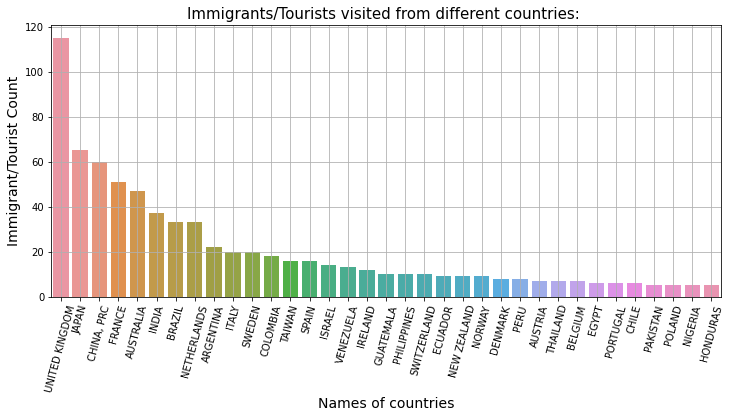

In [122]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.barplot(x="Country_Names", y="Total_Immigrants", data=Immigrant_by_Country)
#plt.fontsize=16
plt.xticks(rotation=75)
plt.grid(True)
plt.xlabel("Names of countries", fontsize=14)
plt.ylabel("Immigrant/Tourist Count", fontsize=14)
plt.title("Immigrants/Tourists visited from different countries: ", fontsize=15)

### `Quick Query 22: `
Finding Country names & reason for travelling `business & pleasure` on a bargraph.

In [123]:
Travel_Reasons = Visa_Category_Type.join(Country_Codes_df, (Visa_Category_Type.Citizenship_Country == Country_Codes_df.Country_Codes ),
                        how='inner').groupBy(['Citizenship_Country','Country_Names','Visa_Purpose'])\
                        .count().orderBy('count', ascending=False)
Travel_Reasons.show(7)

+-------------------+--------------+------------+-----+
|Citizenship_Country| Country_Names|Visa_Purpose|count|
+-------------------+--------------+------------+-----+
|                135|UNITED KINGDOM|    Pleasure|   92|
|                209|         JAPAN|    Pleasure|   57|
|                245|    CHINA, PRC|    Pleasure|   47|
|                438|     AUSTRALIA|    Pleasure|   45|
|                111|        FRANCE|    Pleasure|   43|
|                689|        BRAZIL|    Pleasure|   31|
|                213|         INDIA|    Pleasure|   29|
+-------------------+--------------+------------+-----+
only showing top 7 rows



Text(0.5, 1.0, 'Purpose of immigrants visit from different Countries')

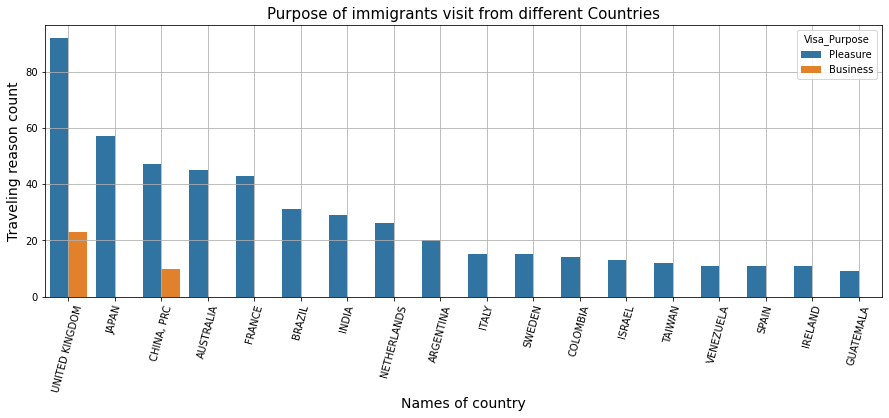

In [124]:
#take = take.toPandas()
fig, ax = plt.subplots(figsize=(15, 5))

# spark to pandas and slicing
Travel_Reasons = Travel_Reasons.toPandas()
Travel_Reasons = Travel_Reasons[:20]

ax = sns.barplot(x="Country_Names", y= "count", hue="Visa_Purpose", data=Travel_Reasons)
plt.grid(True)
plt.xlabel("Names of country", fontsize=14)
plt.ylabel("Traveling reason count", fontsize=14)
#plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.5))
plt.xticks(rotation=75)
plt.title("Purpose of immigrants visit from different Countries", fontsize=15)

### `L3` - `State Codes and Name in data frame:`

+ Here I'm creating a data frame with `State codes` and their `State names` considering this table will decode our `I94ADDR` column with immigration table.

In [125]:
# selecting only state codes deems valid
Label_Contents = [state.strip() for state in Label_Contents]
States = Label_Contents[981:1036]

In [126]:
# splitting codes on '='
Splitted_States = [state.split("=") for state in States]

In [127]:
# replace and strip unnecessary regualr expressions
State_Codes = [state[0].replace("'","").strip() for state in Splitted_States]
State_Names = [state[1].replace("'","").strip() for state in Splitted_States]

In [128]:
# placing them into a data frame
State_Codes_df = pd.DataFrame({"State_Codes" : State_Codes, "State_Names": State_Names})
State_Codes_df.head(7)

,State_Codes,State_Names
0,AL,ALABAMA
1,AK,ALASKA
2,AZ,ARIZONA
3,AR,ARKANSAS
4,CA,CALIFORNIA
5,CO,COLORADO
6,CT,CONNECTICUT


In [129]:
State_Codes_df.count()

State_Codes    55
State_Names    55
dtype: int64

In [130]:
State_Codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State_Codes  55 non-null     object
 1   State_Names  55 non-null     object
dtypes: object(2)
memory usage: 1008.0+ bytes


> Sending this `State_Codes_df` table as a dimension table into the cloud

In [131]:
# spark.createDataFrame(State_Codes_df.items(), ['code', 'state'])\
#         .write.mode("overwrite")\
#         .parquet(path=output_data + 'State_Codes_df/')

In [132]:
# converting this table as a spark data frame
State_Codes_df=spark.createDataFrame(State_Codes_df) 

In [133]:
State_Codes_df.head()

Row(State_Codes='AL', State_Names='ALABAMA')

### `Quick Query 23: `

+ Finding immigrant's choice of `States` to move or visit to?

In [134]:
# adding 'fact immigration table' and 'state codes table' to get the state name
Immigrants_Choice_State = Fact_Immigration.join(State_Codes_df, \
                    (Fact_Immigration.Current_State == State_Codes_df.State_Codes), how="left")
# removing duplicated columns
Immigrants_Choice_State = Immigrants_Choice_State.drop('Current_State')
Immigrants_Choice_State.toPandas().head(5)

,Immigration_Id,Admission_Num,Immigrants_Age,Citizenship_Country,Residency_Country,Visa_Type,Immigration_Year,Immigration_Month,Port_Code,Arrival_Date,Departure_Date,Match_Flag,Birth_Year,Gender,Airline_Code,Flight_Num,Means_of_Travel,Visa_Purpose,State_Codes,State_Names
0,1863656,762960085,45,438,438,B2,2016,4,LOS,2016-04-10,2016-04-16,M,1971,M,QF,15,Air,Pleasure,AZ,ARIZONA
1,1793960,55935236633,43,123,123,WB,2016,4,NYC,2016-04-10,2016-04-14,M,1973,None,KL,00641,Air,Business,AZ,ARIZONA
2,594975,92678404630,51,582,582,B2,2016,4,LVG,2016-04-03,2016-07-10,M,1965,M,AA,01686,Air,Pleasure,AZ,ARIZONA
3,80353,92477571130,34,260,260,B1,2016,4,CHI,2016-04-01,2016-04-11,M,1982,M,SQ,00016,Air,Business,AZ,ARIZONA
4,878052,92845848430,35,260,260,B1,2016,4,LOS,2016-04-05,2016-04-27,M,1981,M,PR,00102,Air,Business,AZ,ARIZONA


In [135]:
# number of immigrants move to different states
State_Visited = Immigrants_Choice_State.groupBy('State_Names').count().orderBy('Count', ascending=False)
State_Visited.show(10)

+-------------+-----+
|  State_Names|count|
+-------------+-----+
|      FLORIDA|  188|
|   CALIFORNIA|  163|
|     NEW YORK|  161|
|         null|   67|
|       HAWAII|   53|
|        TEXAS|   42|
|       NEVADA|   34|
|     ILLINOIS|   31|
|         GUAM|   27|
|MASSACHUSETTS|   26|
+-------------+-----+
only showing top 10 rows



Text(0.5, 1.0, 'Number of tourists visited to different States')

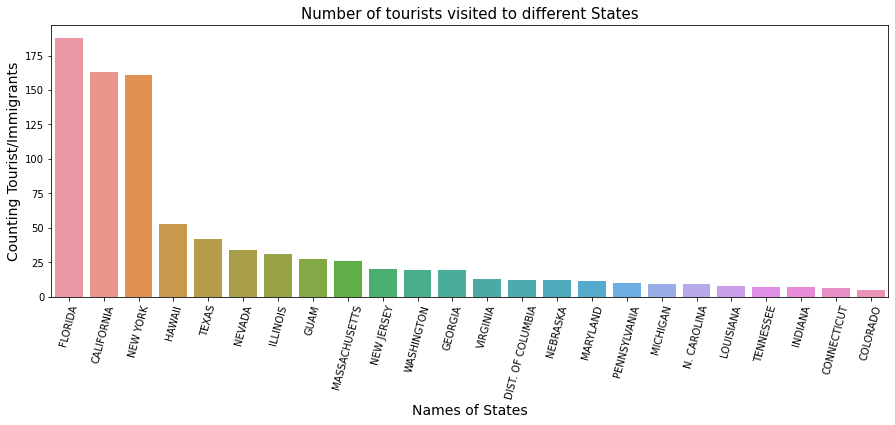

In [136]:
fig, ax = plt.subplots(figsize=(15, 5))

# converting to pandas
State_Visited = State_Visited.toPandas()
State_Visited = State_Visited[:25]
# pandas barplot designing steps..
ax = sns.barplot(x="State_Names", y= "count", data=State_Visited)
plt.xlabel("Names of States", fontsize=14)
plt.ylabel("Counting Tourist/Immigrants", fontsize=14)
plt.xticks(rotation=75)
plt.title("Number of tourists visited to different States", fontsize=15)

## `Airport Code Table`
> This is a simple table of airport codes and corresponding cities. I think the airport code table doesn't hold any important significance for our immigration trail analysis.

In [137]:
#df_airport_codes = pd.read_csv("airport-codes_csv.csv")

In [138]:
Airport_Codes_df = spark.read.options(delimiter=",").csv("airport-codes_csv.csv",header=True)

In [139]:
# separating 'coordinats' column into >> 'longitude' and 'latitude' columns
Airport_Codes_df = Airport_Codes_df.withColumn('latitude', split(Airport_Codes_df['coordinates'], ',').getItem(0)) \
       .withColumn('longitude', split(Airport_Codes_df['coordinates'], ',').getItem(1)) \
      
Airport_Codes_df.toPandas().head(3)

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates,latitude,longitude
0,00A,heliport,Total Rf Heliport,11,NA,US,US-PA,Bensalem,00A,None,00A,"-74.93360137939453, 40.07080078125",-74.93360137939453,40.07080078125
1,00AA,small_airport,Aero B Ranch Airport,3435,NA,US,US-KS,Leoti,00AA,None,00AA,"-101.473911, 38.704022",-101.473911,38.704022
2,00AK,small_airport,Lowell Field,450,NA,US,US-AK,Anchor Point,00AK,None,00AK,"-151.695999146, 59.94919968",-151.695999146,59.94919968


In [140]:
#Airport_Codes = Airport_Codes_df.alias('Airport_Codes')

In [141]:
Airport_Codes_df.printSchema()

root
 |-- ident: string (nullable = true)
 |-- type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- elevation_ft: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- iso_country: string (nullable = true)
 |-- iso_region: string (nullable = true)
 |-- municipality: string (nullable = true)
 |-- gps_code: string (nullable = true)
 |-- iata_code: string (nullable = true)
 |-- local_code: string (nullable = true)
 |-- coordinates: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)



In [142]:
print("Airport_Codes_df table dimension: ")
print("Number of rows: " + str(Airport_Codes_df.count()) + " \nand Number of columns: " + str(len(Airport_Codes_df.columns)))

Airport_Codes_df table dimension: 
Number of rows: 55075 
and Number of columns: 14


In [143]:
print("Number of NULL values by each column on Airport_Codes_df Table: ")
Airport_Codes_df.select([count(when(col(c).isNull(), c))\
                         .alias(c) for c in Airport_Codes_df.columns]).show(n=2, truncate=False, vertical=True)

Number of NULL values by each column on Airport_Codes_df Table: 
-RECORD 0-------------
 ident        | 0     
 type         | 0     
 name         | 0     
 elevation_ft | 7006  
 continent    | 0     
 iso_country  | 0     
 iso_region   | 0     
 municipality | 5676  
 gps_code     | 14045 
 iata_code    | 45886 
 local_code   | 26389 
 coordinates  | 0     
 latitude     | 0     
 longitude    | 0     



In [144]:
#Gather required columns for the airports table
Airport_Codes_df.createOrReplaceTempView("Airport_Table")

# selecting columns deems important
Airport_Details = spark.sql('''
                SELECT distinct  \
                         ident        AS Airport_Code, \
                         type         AS Airport_Type, \
                         name         AS Airport_Name, \
                         double(elevation_ft) AS Elevation_Ft, \
                         continent    AS Continent, \
                         iso_country  AS Country, \
                         iso_region   AS Region, \
                         municipality AS Municipality, \
                         gps_code     AS Gps_Code, \
                         iata_code    AS Iata_Code,\
                         local_code   AS Local_Code, \
                         latitude     AS Latitude,\
                         longitude    AS Longitude \
                         FROM Airport_Table \
                WHERE (iata_code is NOT NULL) AND (iata_code != '0')\
                AND (type != 'closed')
                ''')

Airport_Details.toPandas().head(3)

,Airport_Code,Airport_Type,Airport_Name,Elevation_Ft,Continent,Country,Region,Municipality,Gps_Code,Iata_Code,Local_Code,Latitude,Longitude
0,CA-0446,small_airport,Stuart Island Airstrip,360.0,NA,CA,CA-BC,Big Bay,None,YRR,None,-125.131616592,50.4094474336
1,CYWJ,medium_airport,DÃ©line Airport,703.0,NA,CA,CA-NT,DÃ©line,CYWJ,YWJ,None,-123.43599700927734,65.21109771728516
2,CYYC,large_airport,Calgary International Airport,3557.0,NA,CA,CA-AB,Calgary,CYYC,YYC,None,-114.019996643,51.113899231


In [145]:
print("Number of rows: " + str(Airport_Details.count()) + "\nNumber of columns: " + str(len(Airport_Details.columns)))

Number of rows: 8830
Number of columns: 13


**`Analytical perspective: `**

After removing `null`, `zero-value` `iata_code` and `closed` airport types, we can see we've lost 83.96% of rows from the airport table.The number of actively operating airports came down from 55,075 to 8830, a significant reduction of available airports.

Besides I think, that `Airport Table` does not carry any significant importance in our immigration-data analysis paradigm.

###  `Quick query 23, 24 & 25`
`23:`

In [146]:
print("Counting number of 'iata_code' with null values")
Null_iata_code_count = spark.sql('''
                               SELECT count(ISNULL('iata_code')) Iata_Code_Count \
                               FROM Airport_Table \
                               WHERE iata_code IS NULL
                               ''')

Null_iata_code_count.show()

Counting number of 'iata_code' with null values
+---------------+
|Iata_Code_Count|
+---------------+
|          45886|
+---------------+



`24:`

In [147]:
print("Counting number of 'Airport_Type' are closed with valid 'iata_code': ")
Closed_Airport_Count = spark.sql('''
                               SELECT count(*) AS Airport_Type_Count \
                               FROM Airport_Table \
                               WHERE (iata_code is NOT NULL) AND (iata_code != '0')\
                                      AND (type == 'closed')
                               ''')

Closed_Airport_Count .show()

Counting number of 'Airport_Type' are closed with valid 'iata_code': 
+------------------+
|Airport_Type_Count|
+------------------+
|               279|
+------------------+



`25:`

In [148]:
# counting number of records on Airport detail table
print("Number of airports those are operating or active: ")
Airport_Type_Count = spark.sql('''
                               SELECT type AS Airport_Type, count(*) AS Airport_Count \
                               FROM Airport_Table \
                               WHERE (type != 'closed')\
                               GROUP BY  Airport_Type having count(*) >= 1 \
                               ORDER BY Airport_Count DESC
                               ''')

Airport_Type_Count.toPandas().head(7)

Number of airports those are operating or active: 


,Airport_Type,Airport_Count
0,small_airport,33965
1,heliport,11287
2,medium_airport,4550
3,seaplane_base,1016
4,large_airport,627
5,balloonport,24


> Sending this `Airport_Details` table into the cloud. I'll not be using this table as a dimension table.

In [149]:
# write dim_temperature table to parquet files
# Airport_Details.write.mode("overwrite")\
#                    .parquet(path=output_data + 'Airport_Details/')

> ### Exploring `Temperature data` set

In [150]:
#fname = '../../data2/GlobalLandTemperaturesByCity.csv'
#df_temp_1 = spark.read.csv(fname)
#df_temp_1.show(3)

In [151]:
#fname = '../../data2/GlobalLandTemperaturesByCity.csv'
#df_temp_2 = pd.read_csv(fname)
#df_temp_2.head(3)

In [152]:
# reading 'GlobalLandTemperaturesByCity.csv' file
Temp_df = 'GlobalLandTemperaturesByCity.csv'
Temp_df = spark.read.format('csv').options(header=True, delimiter=',').load(Temp_df)
Temp_df.show(5)

+----------+------------------+-----------------------------+-----+-------+--------+---------+
|        dt|AverageTemperature|AverageTemperatureUncertainty| City|Country|Latitude|Longitude|
+----------+------------------+-----------------------------+-----+-------+--------+---------+
|1743-11-01|             6.068|           1.7369999999999999|Århus|Denmark|  57.05N|   10.33E|
|1743-12-01|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-01-01|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-02-01|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-03-01|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
+----------+------------------+-----------------------------+-----+-------+--------+---------+
only showing top 5 rows



In [153]:
Temp_df.printSchema()

root
 |-- dt: string (nullable = true)
 |-- AverageTemperature: string (nullable = true)
 |-- AverageTemperatureUncertainty: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)



In [154]:
# Total number of rows and columns with temp data set
print("Number of rows: " + str(Temp_df.count()) + " and columns: " + str(len(Temp_df.columns)))

Number of rows: 8599212 and columns: 7


In [155]:
print("The 'GlobalLandTemperaturesByCity.csv' table: ") 
record_count(Temp_df)

The 'GlobalLandTemperaturesByCity.csv' table: 
is not empty, it has total 8599212 records.


### `GlobalLandTemperaturesByCity` table and it's narrow scope: 
Temperature table is not a good candidate for `dimension table` on considering
+  `Immigration table` has values all dated starting from year `2016`.
+  `Temperature table` has values starting back from 1743 upto year 2013. 
+  There are no updated temperature values after 2013.

We know that `Temperature` always varies date to date. We'll have a mismatched temperature profile by US City location, if we choose date as a foreing key? On this argument, I've decided to join `temperature-table` with `US_port_locations` table and creating `US_Port` as the primary key for this dimension table.

In [156]:
print('These are the first five row values of US Cities temperature data set: ')
Temp_df = Temp_df.withColumn("index", monotonically_increasing_id())
Temp_df.orderBy(desc("index")).drop("index").show(5)

These are the first five row values of US Cities temperature data set: 
+----------+------------------+-----------------------------+------+-----------+--------+---------+
|        dt|AverageTemperature|AverageTemperatureUncertainty|  City|    Country|Latitude|Longitude|
+----------+------------------+-----------------------------+------+-----------+--------+---------+
|2013-09-01|              null|                         null|Zwolle|Netherlands|  52.24N|    5.26E|
|2013-08-01|            18.025|                        0.298|Zwolle|Netherlands|  52.24N|    5.26E|
|2013-07-01|            18.775|                        0.193|Zwolle|Netherlands|  52.24N|    5.26E|
|2013-06-01|            15.043|                        0.261|Zwolle|Netherlands|  52.24N|    5.26E|
|2013-05-01|            11.464|          0.23600000000000002|Zwolle|Netherlands|  52.24N|    5.26E|
+----------+------------------+-----------------------------+------+-----------+--------+---------+
only showing top 5 rows



### `Data Type conversion:`

We have `Global Temperature Table`,`AverageTemperatureUncertainty`, `Latitude`, `Longitude` columns are all string data type? These are all numerical values, effectively we need data type conversion that will be more compatible to our data analysis. So I cast them to integer data type. The date column will also chage later in the process.

In [157]:
# type casting our average temperature & Average_Temperature_Uncertainty columns
Temp_df = Temp_df.withColumn("Average_Temperature", col("AverageTemperature").cast(IntegerType()))
Temp_df = Temp_df.withColumn("Average_Temperature_Uncertainty", col("AverageTemperatureUncertainty").cast(IntegerType()))
Temp_df = Temp_df.withColumn("Latitude", col("Latitude").cast(IntegerType()))
Temp_df = Temp_df.withColumn("Longitude", col("Longitude").cast(IntegerType()))

# dropping two columns because of name change
Temp_df = Temp_df.drop('AverageTemperature','AverageTemperatureUncertainty')
Temp_df.printSchema()

root
 |-- dt: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Latitude: integer (nullable = true)
 |-- Longitude: integer (nullable = true)
 |-- index: long (nullable = false)
 |-- Average_Temperature: integer (nullable = true)
 |-- Average_Temperature_Uncertainty: integer (nullable = true)



### `T1` - `GlobalLandTemperaturesByCity` Data Exploration:

In [158]:
#Temperature_table = Temp_df.alias('Temperature_Table')
Temp_df.createOrReplaceTempView("City_Temp_Table")

In [159]:
# exploring number of null values in this table
Temp_df.select([count(when(col(c).isNull(), c))\
                         .alias(c) for c in Temp_df.columns]).show()

+---+----+-------+--------+---------+-----+-------------------+-------------------------------+
| dt|City|Country|Latitude|Longitude|index|Average_Temperature|Average_Temperature_Uncertainty|
+---+----+-------+--------+---------+-----+-------------------+-------------------------------+
|  0|   0|      0| 8599212|  8599212|    0|             364130|                         364130|
+---+----+-------+--------+---------+-----+-------------------+-------------------------------+



**`Analytical perspective: `** 

We have `Latitude` & `Longitude` columns have all `(8599212)` rows are null values. So these column values don't have any sort utility for our analysis. Also there are `364,130` rows of null values present with the `AverageTemperature` & `Average_Temperature_Uncertainty` columns which is not a significant lapse to eliminate them. With `364,130` row values are null, which is about 4.23% of the total`8,599,212` rows.

###  `Quick query 26, 27 & 28`
`26:` Null temperature values by countries?

In [160]:
# counting Null temperature value by country
print("Displaying number of null temperature values by county: \n")
Null_Temperature_Count = spark.sql('''
                             Select Country, Average_Temperature, count(*) as Null_Temp_Count\
                             From City_Temp_Table \
                             Where Average_Temperature IS NULL\
                             Group By Country, Average_Temperature\
                             Order By Null_Temp_Count Desc
                                   ''')
Null_Temperature_Count.show(10)

Displaying number of null temperature values by county: 

+-------------+-------------------+---------------+
|      Country|Average_Temperature|Null_Temp_Count|
+-------------+-------------------+---------------+
|        India|               null|          54358|
|    Indonesia|               null|          49960|
|United States|               null|          25765|
|       Brazil|               null|          23935|
|     Pakistan|               null|          15966|
|      Nigeria|               null|          15335|
|       Russia|               null|          12571|
|     Colombia|               null|           8771|
|        China|               null|           8670|
|     Malaysia|               null|           7757|
+-------------+-------------------+---------------+
only showing top 10 rows



`27:` Countries temperature when it is not null?

In [161]:
print("Displaying temperature values by country when it is not null: \n")
# separating City and Country Temperature Table
City_Country_Temp = spark.sql('''
                     Select City, Country, ROUND(AVG(Average_Temperature),3) AS Avg_temp
                     From City_Temp_Table
                     Where Average_Temperature IS NOT NULL
                     Group by City, Country
                     Order by City ASC
                     ''')

City_Country_Temp.show(5)

Displaying temperature values by country when it is not null: 

+--------+-------+--------+
|    City|Country|Avg_temp|
+--------+-------+--------+
|A Coruña|  Spain|  12.649|
|  Aachen|Germany|   8.404|
| Aalborg|Denmark|   7.337|
|     Aba|Nigeria|   26.12|
|  Abadan|   Iran|  24.528|
+--------+-------+--------+
only showing top 5 rows



`28:` Number of distinct Country and City in our temperature table.

In [162]:
Distinct_City_Country = spark.sql("Select count(distinct Country) AS Distinct_Country, \
                                   count(distinct City) AS Distinct_City\
                                   from City_Temp_Table")

Distinct_City_Country.show(4)

+----------------+-------------+
|Distinct_Country|Distinct_City|
+----------------+-------------+
|             159|         3448|
+----------------+-------------+



###   `T2` - World >> Temperature Exploration:

`Creating world temperature table:`
1. By eliminating all the `Null-Temperature-values` from the `World temperature data`.
2. Changing `Date_Records` with `date` data type and delving to segement date columns.
3. Transforming columns to `Upper` data type

In [163]:
# subselecting, renaming & changing data type with world country and city
World_Temprature = spark.sql('''
                        select date(dt) Date_Records,
                                   int(date_format(date(dt),'yyyy')) Year,
                                    date_format(date(dt),'MMMM') Month_Name,
                                      int(date_format(date(dt),'MM')) Month_Num,
                                       int(date_format(date(dt),'dd')) Day,
                                        round(float(Average_Temperature),2) Avg_Temp,
                                          upper(City) Global_City, 
                                           upper(Country) Country
                        from City_Temp_Table
                        where to_date(dt,'yyyy-MM-dd') >= '2000-01-01' 
                        AND Average_Temperature IS NOT NULL
                        
                  ''')

World_Temprature.show(7)

+------------+----+----------+---------+---+--------+-----------+-------+
|Date_Records|Year|Month_Name|Month_Num|Day|Avg_Temp|Global_City|Country|
+------------+----+----------+---------+---+--------+-----------+-------+
|  2000-01-01|2000|   January|        1|  1|     3.0|      ÅRHUS|DENMARK|
|  2000-02-01|2000|  February|        2|  1|     3.0|      ÅRHUS|DENMARK|
|  2000-03-01|2000|     March|        3|  1|     3.0|      ÅRHUS|DENMARK|
|  2000-04-01|2000|     April|        4|  1|     8.0|      ÅRHUS|DENMARK|
|  2000-05-01|2000|       May|        5|  1|    13.0|      ÅRHUS|DENMARK|
|  2000-06-01|2000|      June|        6|  1|    14.0|      ÅRHUS|DENMARK|
|  2000-07-01|2000|      July|        7|  1|    16.0|      ÅRHUS|DENMARK|
+------------+----+----------+---------+---+--------+-----------+-------+
only showing top 7 rows



In [164]:
World_Temprature.dtypes

[('Date_Records', 'date'),
 ('Year', 'int'),
 ('Month_Name', 'string'),
 ('Month_Num', 'int'),
 ('Day', 'int'),
 ('Avg_Temp', 'float'),
 ('Global_City', 'string'),
 ('Country', 'string')]

In [165]:
# how many row values only with country Germany
print("Number of rows data with country Germany: " +
str(World_Temprature.select('Country').where(World_Temprature.Country == 'GERMANY').count()))

Number of rows data with country Germany: 13284


In [166]:
# how many row values only with country Nigeria
print("Number of rows with country Nigeria: " + str(World_Temprature.select('Country').where(World_Temprature.Country == 'NIGERIA')
.count()))

Number of rows with country Nigeria: 14924


+ **Yearly world `City and Country` Temperature distribution in a  `Pivot table`** 

In [167]:
# World countries with Yearly and monthly Temperature pivoted > 'Month Name'
World_Temp_Yearly = World_Temprature.groupBy(["Global_City","Country"]).pivot("Year")\
                                              .avg("Avg_Temp")

World_Temp_Yearly.toPandas().head(7)

,Global_City,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,QUJING,CHINA,15.416667,16.000000,16.083333,16.416667,15.666667,15.916667,16.083333,15.833333,15.416667,16.416667,16.750000,15.250000,16.250000,17.500
1,VARNA,BULGARIA,12.916667,13.000000,13.000000,12.000000,12.666667,12.500000,12.333333,13.333333,13.333333,13.250000,13.333333,12.083333,13.250000,13.875
2,EJIGBO,NIGERIA,26.333333,26.333333,26.500000,26.583333,26.583333,26.583333,26.833333,26.833333,26.583333,26.750000,27.083333,26.583333,26.583333,26.625
3,JINGDEZHEN,CHINA,16.166667,16.500000,16.666667,16.583333,16.750000,16.333333,16.750000,17.166667,16.416667,16.750000,16.333333,16.250000,16.083333,17.875
4,LJUBLJANA,SLOVENIA,11.083333,10.416667,10.666667,10.500000,9.666667,9.333333,10.000000,10.916667,10.500000,10.750000,9.833333,10.416667,10.833333,11.250
5,SAINT LOUIS,SENEGAL,25.083333,25.750000,25.250000,25.250000,25.166667,25.583333,25.166667,25.250000,25.333333,24.916667,26.166667,25.583333,25.416667,24.750
6,CHIKMAGALUR,INDIA,25.166667,25.583333,25.750000,25.916667,25.416667,25.333333,25.333333,25.583333,25.333333,25.583333,25.750000,25.250000,25.666667,26.250


> Sending `Yearly World_Temperature` table into the cloud (Not dimension) Table

In [168]:
# write World_Temp_Monthly table to parquet files
# World_Temp_Monthly.write.mode("overwrite")\
#                    .parquet(path=output_data + 'World_Temp_Monthly/')

+ **Displaying Monthly World City Temperature in a pivot table**

In [169]:
# World countries with Yearly and monthly Temperature pivoted > 'Month Name'
World_Temp_Monthly = World_Temprature.groupBy(["Global_City","Country","Year"]).pivot("Month_Name")\
                                              .avg("Avg_Temp")

World_Temp_Monthly.toPandas().head(7)

,Global_City,Country,Year,April,August,December,February,January,July,June,March,May,November,October,September
0,ALMETYEVSK,RUSSIA,2012,9.0,19.0,-13.0,-15.0,-11.0,20.0,19.0,-6.0,15.0,0.0,6.0,12.0
1,AUCKLAND,NEW ZEALAND,2001,17.0,12.0,18.0,20.0,18.0,11.0,13.0,18.0,15.0,16.0,15.0,13.0
2,BIRMINGHAM,UNITED STATES,2000,15.0,28.0,3.0,11.0,8.0,28.0,25.0,15.0,23.0,11.0,18.0,24.0
3,BYTOM,POLAND,2009,12.0,19.0,0.0,0.0,-2.0,19.0,15.0,3.0,13.0,6.0,7.0,15.0
4,CIREBON,INDONESIA,2006,25.0,25.0,25.0,25.0,24.0,25.0,25.0,25.0,25.0,27.0,26.0,25.0
5,GUANARE,VENEZUELA,2012,23.0,23.0,23.0,24.0,24.0,23.0,24.0,24.0,24.0,24.0,24.0,23.0
6,HADEJIA,NIGERIA,2001,32.0,26.0,23.0,23.0,21.0,27.0,29.0,28.0,32.0,26.0,27.0,27.0


### `T3` - `US Only` City Temperature:
For the sake of creating a more focused data set with US City only, I made some SQL query based column changed from world temperature table. This change in table design is more compatiable to my star-schema data model. What I did..
+ Changed `Date_Records` column into `date` data type and into more detailed form.
+ Limit the date starting from year `2000` to available.
+ Eliminated all `null-temperature` values involving US City from the table.

In [170]:
print("Number of rows with US cities only temperature:")
US_City_Temp = World_Temprature.select('Country','Global_City').where(World_Temprature.Country == 'UNITED STATES')
US_City_Temp.count()

Number of rows with US cities only temperature:


42404

In [171]:
print("Number of distinct US Cities with this data set: ",\
                                  US_City_Temp.dropDuplicates(['Global_City']).select("Global_City").count())

Number of distinct US Cities with this data set:  248


In [172]:
# sub-selecting columns, rename and change data type from the temperature table
print("Data set with US City Temperature only: ")
US_Cities_Temperature = spark.sql('''
                        select date(dt) Date_Records,
                                   int(date_format(date(dt),'yyyy')) Year,
                                    date_format(date(dt),'MMMM') Month_Name,
                                      int(date_format(date(dt),'MM')) Month_Num,
                                       int(date_format(date(dt),'dd')) Day,
                                        round(float(Average_Temperature),3) Avg_Temp,
                                          upper(City) US_City, 
                                           upper(Country) Country
                        From City_Temp_Table
                        Where to_date(dt,'yyyy-MM-dd') >= '2000-01-01' 
                        AND Country = 'United States' 
                        AND Average_Temperature IS NOT NULL
                        AND City IS NOT NULL
                  ''')

US_Cities_Temperature.show(7)

Data set with US City Temperature only: 
+------------+----+----------+---------+---+--------+-------+-------------+
|Date_Records|Year|Month_Name|Month_Num|Day|Avg_Temp|US_City|      Country|
+------------+----+----------+---------+---+--------+-------+-------------+
|  2000-01-01|2000|   January|        1|  1|     8.0|ABILENE|UNITED STATES|
|  2000-02-01|2000|  February|        2|  1|    11.0|ABILENE|UNITED STATES|
|  2000-03-01|2000|     March|        3|  1|    14.0|ABILENE|UNITED STATES|
|  2000-04-01|2000|     April|        4|  1|    18.0|ABILENE|UNITED STATES|
|  2000-05-01|2000|       May|        5|  1|    25.0|ABILENE|UNITED STATES|
|  2000-06-01|2000|      June|        6|  1|    25.0|ABILENE|UNITED STATES|
|  2000-07-01|2000|      July|        7|  1|    29.0|ABILENE|UNITED STATES|
+------------+----+----------+---------+---+--------+-------+-------------+
only showing top 7 rows



In [173]:
US_Cities_Temperature.printSchema()

root
 |-- Date_Records: date (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month_Name: string (nullable = true)
 |-- Month_Num: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Avg_Temp: float (nullable = true)
 |-- US_City: string (nullable = true)
 |-- Country: string (nullable = true)



In [174]:
print("US Temperature table with Number of rows: " + str(US_Cities_Temperature.count()) + " and columns: " + str(len(US_Cities_Temperature.columns)))

US Temperature table with Number of rows: 42404 and columns: 8


+ **Yearly `US City and State` Temperature distribution with a `Pivot table`** 

In [175]:
# Pivot the dataframe by year to get average temp in a single row for each city 
US_Yearly_Temper = US_Cities_Temperature.groupBy(["US_City","Country"]).pivot("Year")\
                                              .avg("Avg_Temp")

US_Yearly_Temper.toPandas().head(3)

,US_City,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,BUFFALO,UNITED STATES,8.000000,9.250000,9.166667,7.750000,8.333333,8.750000,9.416667,8.75,8.416667,7.916667,9.083333,9.083333,10.083333,10.111111
1,SAN JOSE,UNITED STATES,14.500000,14.666667,14.416667,14.916667,14.750000,14.583333,14.500000,14.50,14.666667,14.500000,14.250000,14.000000,14.583333,15.666667
2,GREEN BAY,UNITED STATES,7.916667,8.916667,8.583333,7.333333,7.583333,8.583333,8.750000,8.25,7.250000,7.166667,8.916667,8.083333,9.666667,8.666667


In [176]:
# write US_Yearly_Temper table to parquet files
# US_Yearly_Temper.write.mode("overwrite")\
#                    .parquet(path=output_data + 'US_Yearly_Temper/')

+ **`Montly US City Tempeature` with year added on it with a Pivot-table.**

In [177]:
# Pivot the dataframe by Month to get average temp in a single row for each row 
US_Monthly_Temper = US_Cities_Temperature.groupBy(["US_City","Country","Year"]).pivot("Month_Name")\
                                              .avg("Avg_Temp")

US_Monthly_Temper.toPandas().head(3)

,US_City,Country,Year,April,August,December,February,January,July,June,March,May,November,October,September
0,BIRMINGHAM,UNITED STATES,2000,15.0,28.0,3.0,11.0,8.0,28.0,25.0,15.0,23.0,11.0,18.0,24.0
1,SANTA ANA,UNITED STATES,2007,14.0,21.0,12.0,13.0,12.0,20.0,17.0,15.0,16.0,16.0,18.0,19.0
2,CHESAPEAKE,UNITED STATES,2006,15.0,26.0,11.0,7.0,10.0,26.0,23.0,9.0,18.0,14.0,17.0,22.0


In [178]:
# Ordering temperature months in January to December
Monthly_Temp_Renamed = US_Monthly_Temper.select( col("US_City"), col("Year"),\
                                     col("January").alias("Jan_Avg_Temp"),\
                                       col("February").alias("Feb_Avg_Temp"),\
                                        col("March").alias("March_Avg_Temp"),\
                                         col("April").alias("April_Avg_Temp"),\
                                          col("May").alias("May_Avg_Temp"),\
                                            col("June").alias("June_Avg_Temp"),\
                                             col("July").alias("July_Avg_Temp"),\
                                              col("August").alias("August_Avg_Temp"),\
                                               col("September").alias("September_Avg_Temp"),\
                                                col("October").alias("October_Avg_Temp"),\
                                                  col("November").alias("November_Avg_Temp"),\
                                                   col("December").alias("December_Avg_Temp"))
                                         

Monthly_Temp_Renamed.toPandas().head(3)

,US_City,Year,Jan_Avg_Temp,Feb_Avg_Temp,March_Avg_Temp,April_Avg_Temp,May_Avg_Temp,June_Avg_Temp,July_Avg_Temp,August_Avg_Temp,September_Avg_Temp,October_Avg_Temp,November_Avg_Temp,December_Avg_Temp
0,BIRMINGHAM,2000,8.0,11.0,15.0,15.0,23.0,25.0,28.0,28.0,24.0,18.0,11.0,3.0
1,SANTA ANA,2007,12.0,13.0,15.0,14.0,16.0,17.0,20.0,21.0,19.0,18.0,16.0,12.0
2,CHESAPEAKE,2006,10.0,7.0,9.0,15.0,18.0,23.0,26.0,26.0,22.0,17.0,14.0,11.0


In [179]:
# write Monthly_US_Tempr table to parquet files
# Monthly_US_Tempr.write.mode("overwrite")\
#                    .parquet(path=output_data + 'Monthly_US_Tempr/')

In [180]:
#Port_locations_df.dropDuplicates(['Port_State']).select("Port_State").count()

### `T4` - Creating `City Temperature`  ..`dimension Table`

> Date columns could be a great choice to foreign key, but with this table latest date ended on year 2013. On the contrary, our `fact(immigration table)` date-`year` started on `2016`, there would be no match of date between these two tables? So I've created a new column `US_Port` by matching out `US cities` and their respective `Port locations` from the `Port_locations` table with an `INNER-JOIN`.

In [181]:
dim_US_Cities_Tempr = US_Cities_Temperature.join(Port_locations_df,\
                                US_Cities_Temperature.US_City == Port_locations_df.Port_City, how='inner')

dim_US_Cities_Tempr = dim_US_Cities_Tempr.withColumnRenamed("Port_Code","US_Port")
dim_US_Cities_Tempr = dim_US_Cities_Tempr.drop(Port_locations_df.Port_City)
dim_US_Cities_Tempr.toPandas().head(5)

,Date_Records,Year,Month_Name,Month_Num,Day,Avg_Temp,US_City,Country,US_Port,Port_State
0,2000-01-01,2000,January,1,1,16.0,ORLANDO,UNITED STATES,ORL,FL
1,2000-02-01,2000,February,2,1,17.0,ORLANDO,UNITED STATES,ORL,FL
2,2000-03-01,2000,March,3,1,21.0,ORLANDO,UNITED STATES,ORL,FL
3,2000-04-01,2000,April,4,1,21.0,ORLANDO,UNITED STATES,ORL,FL
4,2000-05-01,2000,May,5,1,25.0,ORLANDO,UNITED STATES,ORL,FL


In [182]:
dim_US_Cities_Tempr.count()

16334

In [183]:
dim_US_Cities_Tempr.printSchema()

root
 |-- Date_Records: date (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month_Name: string (nullable = true)
 |-- Month_Num: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Avg_Temp: float (nullable = true)
 |-- US_City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- US_Port: string (nullable = true)
 |-- Port_State: string (nullable = true)



> Sending dim_US_Cities_Tempr table to the cloud as a dimension table

In [184]:
# write Monthly_US_Tempr table to parquet files
# dim_US_Cities_Tempr.write.mode("overwrite")\
#                    .parquet(path=output_data + 'dim_US_Cities_Tempr/')

### `Quick Query 29:`

`29:` Finding specific dated `US-Cities` temperature.

In [185]:
dim_US_Cities_Tempr.createOrReplaceTempView("City_Temp_Table")

City_Port_Temper = spark.sql('''SELECT ct.Date_Records, ct.Year, ct.US_City, ct.Port_State,\
                                      ct.Month_Name, ct.Avg_Temp
                                      FROM City_Temp_Table ct
                                      WHERE ct.US_City == 'ORLANDO'
                                      AND (ct.Year < 2007) OR (ct.Month_Name == 'July')
                                      ORDER BY ct.Year ASC, ct.Avg_Temp DESC
                                      ''')
City_Port_Temper.toPandas().head(5)

,Date_Records,Year,US_City,Port_State,Month_Name,Avg_Temp
0,2000-07-01,2000,PHOENIX,AZ,July,33.0
1,2000-07-01,2000,LAREDO,TX,July,31.0
2,2000-07-01,2000,AUSTIN,TX,July,30.0
3,2000-07-01,2000,SAN ANTONIO,TX,July,30.0
4,2000-07-01,2000,LAS VEGAS,NV,July,30.0


### `T5` - `Fact_Immigration` ( Fact Table) & `dim_US_Cities_Tempr` ( dimension table) connection.
### `Query 30:`
`1.` If we want to find out the temperature of the cities immigrant have moved and travelled? 

`2.` Is there any correlations between the city temperature and immigrants move?

In [186]:
print('Immigrants arrival city and its temperature profile')

Fact_Immigration.createOrReplaceTempView("Fact_Immigration")
dim_US_Cities_Tempr.createOrReplaceTempView("City_Temp_Table")

Immigrant_City_Tempr = spark.sql('''
                               SELECT DISTINCT ft.Immigration_Id, ft.Arrival_Date, ft.Means_of_Travel,
                                      ct.US_City, ct.Port_State, ct.Avg_Temp
                               FROM Fact_Immigration AS ft
                               INNER JOIN City_Temp_Table AS ct
                                               ON ft.Port_Code == ct.US_Port
                               WHERE Immigration_Id IS NOT NULL
                               AND Arrival_Date IS NOT NULL 
                        ''')
Immigrant_City_Tempr.show(5)

Immigrants arrival city and its temperature profile
+--------------+------------+---------------+-------------+----------+--------+
|Immigration_Id|Arrival_Date|Means_of_Travel|      US_City|Port_State|Avg_Temp|
+--------------+------------+---------------+-------------+----------+--------+
|       4866124|  2016-04-26|            Air|      DETROIT|        MI|    15.0|
|       5835717|  2016-04-30|            Air|      DETROIT|        MI|    21.0|
|       5518986|  2016-04-29|            Air|SAN FRANCISCO|        CA|    12.0|
|       1858517|  2016-04-10|            Air|SAN FRANCISCO|        CA|     8.0|
|        820045|  2016-04-05|           null|    LAS VEGAS|        NV|    10.0|
+--------------+------------+---------------+-------------+----------+--------+
only showing top 5 rows



In [187]:
# Immigrant_City_Tempr = Fact_Immigration_Inclusive. \
#    select('Immigration_Id', 'Arrival_Date', 'Means_of_Travel','Port_Code'). \
#    join(dim_US_Cities_Tempr, Fact_Immigration_Inclusive.Port_Code == dim_US_Cities_Tempr.US_Port). \
#    orderBy(Fact_Immigration_Inclusive.Immigration_Id)

#Immigrant_City_Tempr.toPandas().head(3)

In [188]:
#trial1.select('Port_State').count()
#Same1.dropDuplicates(['Immigration_Id']).select('Immigration_Id').count()

### `Quick Query: ` `31`
> Any correlation between `immigrant's/tourists choice city` & its `average temperature` profile?

In [189]:
#print("Immigrants arrival city temperature and means of travel: ")
#Immigrant_City_Tempr  = Immigrant_City_Tempr.groupBy('Immigration_Id', 'Arrival_Date', 'US_City', 'Port_State', 'Means_of_Travel').\
#                                   agg(round(avg('Avg_Temp'),2).alias('City_Temp'))

#Immigrant_City_Tempr.toPandas().head(7)

In [190]:
# Finding any correlation between city temperature and immigrants visit?
print("Number of immigrants and City temperature: \n")
CityTemp_N_Immigrants = Immigrant_City_Tempr.groupBy('US_City', 'Port_State').agg(count('Immigration_Id').alias("Number_of_Immigrants"),\
                                       round(avg('Avg_Temp'),2).alias('City_Temp')).\
                                        sort(col('Number_of_Immigrants').desc())
CityTemp_N_Immigrants.show(7)

Number of immigrants and City temperature: 

+-------------+----------+--------------------+---------+
|      US_City|Port_State|Number_of_Immigrants|City_Temp|
+-------------+----------+--------------------+---------+
|     NEW YORK|        NY|                4805|      9.0|
|  LOS ANGELES|        CA|                2120|     17.5|
|        MIAMI|        FL|                1776|    21.31|
|      CHICAGO|        IL|                1350|     10.5|
|      ATLANTA|        GA|                 999|     14.0|
|SAN FRANCISCO|        CA|                 825|     15.0|
|      HOUSTON|        TX|                 744|     19.5|
+-------------+----------+--------------------+---------+
only showing top 7 rows



`Findings: ` It seems like higher temperature cities are attracting more tourists or immigrants? But the correlations between immigrants choice city and it's temperature is not conclusive but more more peripheral.

> ## `Demography data set` a `Dimension table`

In [191]:
Demog_data = 'us-cities-demographics.csv'
Demog_df = spark.read.format('csv').options(header=True, delimiter=';').load(Demog_data )
Demog_df.toPandas().head(3)

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601,41862,82463,1562,30908,2.6,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129,49500,93629,4147,32935,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040,46799,84839,4819,8229,2.58,AL,Asian,4759


In [192]:
Demog_df.printSchema()

root
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Median Age: string (nullable = true)
 |-- Male Population: string (nullable = true)
 |-- Female Population: string (nullable = true)
 |-- Total Population: string (nullable = true)
 |-- Number of Veterans: string (nullable = true)
 |-- Foreign-born: string (nullable = true)
 |-- Average Household Size: string (nullable = true)
 |-- State Code: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Count: string (nullable = true)



In [193]:
print("The Table Dimension of 'us-cities-demographics.csv' data set: ")
print("Number of rows: " + str(Demog_df.count()) + " and columns: " + str(len(Demog_df.columns)))

The Table Dimension of 'us-cities-demographics.csv' data set: 
Number of rows: 2891 and columns: 12


In [194]:
print("Null value count with the demography data set by Columns:\n")
Demog_df.select([count(when(col(c).isNull(), c)).alias(c) for c in Demog_df.columns]).show(n=2, truncate=False, vertical=True)

Null value count with the demography data set by Columns:

-RECORD 0---------------------
 City                   | 0   
 State                  | 0   
 Median Age             | 0   
 Male Population        | 3   
 Female Population      | 3   
 Total Population       | 0   
 Number of Veterans     | 13  
 Foreign-born           | 13  
 Average Household Size | 16  
 State Code             | 0   
 Race                   | 0   
 Count                  | 0   



`NOTE: ` We've a very small number of `Null-values` present in this dataset, there is no need to make any sort of elimination.

### `D1` -  Data column with `data-type transformation`

In [195]:
# creating a Temporary View with the data set
Demog_df.createOrReplaceTempView("Demog_Table")

# Rename columms and Change datatypes
US_City_Demog_data = spark.sql('''
                     SELECT upper(City) Demog_City, \
                         upper(State) State_Name, \
                         int(`Male Population`) Male_Population, \
                         int(`Female Population`) Female_Population , \
                         int(`Total Population`) Total_Population, \
                         float(`Median Age`) Median_Age, \
                         int(`Number of Veterans`) Number_Of_Veterans, \
                         int(`Foreign-Born`) Foreign_Born, \
                         float(`Average Household Size`) Average_Household_Size, \
                         string(`Race`) Race, \
                         int(`Count`) Count \
                     FROM Demog_Table
                                     ''')

US_City_Demog_data.toPandas().head(7)

,Demog_City,State_Name,Male_Population,Female_Population,Total_Population,Median_Age,Number_Of_Veterans,Foreign_Born,Average_Household_Size,Race,Count
0,SILVER SPRING,MARYLAND,40601.0,41862.0,82463,33.799999,1562.0,30908.0,2.60,Hispanic or Latino,25924
1,QUINCY,MASSACHUSETTS,44129.0,49500.0,93629,41.000000,4147.0,32935.0,2.39,White,58723
2,HOOVER,ALABAMA,38040.0,46799.0,84839,38.500000,4819.0,8229.0,2.58,Asian,4759
3,RANCHO CUCAMONGA,CALIFORNIA,88127.0,87105.0,175232,34.500000,5821.0,33878.0,3.18,Black or African-American,24437
4,NEWARK,NEW JERSEY,138040.0,143873.0,281913,34.599998,5829.0,86253.0,2.73,White,76402
5,PEORIA,ILLINOIS,56229.0,62432.0,118661,33.099998,6634.0,7517.0,2.40,American Indian and Alaska Native,1343
6,AVONDALE,ARIZONA,38712.0,41971.0,80683,29.100000,4815.0,8355.0,3.18,Black or African-American,11592


In [196]:
US_City_Demog_data.printSchema()

root
 |-- Demog_City: string (nullable = true)
 |-- State_Name: string (nullable = true)
 |-- Male_Population: integer (nullable = true)
 |-- Female_Population: integer (nullable = true)
 |-- Total_Population: integer (nullable = true)
 |-- Median_Age: float (nullable = true)
 |-- Number_Of_Veterans: integer (nullable = true)
 |-- Foreign_Born: integer (nullable = true)
 |-- Average_Household_Size: float (nullable = true)
 |-- Race: string (nullable = true)
 |-- Count: integer (nullable = true)



In [197]:
print("The US_City_Demog_data table: ") 
record_count(US_City_Demog_data)

The US_City_Demog_data table: 
is not empty, it has total 2891 records.


In [198]:
# write US_City_Demog_data table to parquet files
# US_City_Demog_data.write.mode("overwrite")\
#                        .parquet(path=output_data + 'US_City_Demog_data/')

### `D2` -  `Demography` Data with  `analytical` exploration: 
### `Quick Query: 32 & 33`
`32:` Number of distinct City and State with demography data set.

In [199]:
# Total records with the data set & distinct City and State Count
Total_City_State_Count = spark.sql("Select count(*) AS Total_Records, \
                                       count(distinct City) AS Distinct_City, \
                                         count(distinct State) AS Distinct_State \
                                            from Demog_Table").show()

+-------------+-------------+--------------+
|Total_Records|Distinct_City|Distinct_State|
+-------------+-------------+--------------+
|         2891|          567|            49|
+-------------+-------------+--------------+



`33:`Race distribution count by City and State.

In [200]:
Race_By_City_State = spark.sql("Select City, State, count(distinct Race) AS DistinctRace \
                                    from Demog_Table \
                                             Group by City, State").show(5)

+--------------------+--------+------------+
|                City|   State|DistinctRace|
+--------------------+--------+------------+
|          Cincinnati|    Ohio|           5|
|           Lynchburg|Virginia|           5|
|         Kansas City|  Kansas|           5|
|Louisville/Jeffer...|Kentucky|           5|
|              Dayton|    Ohio|           5|
+--------------------+--------+------------+
only showing top 5 rows



### `D3` - `Pivoted demography table` with `Race` distribution.

In [201]:
# Pivot the dataframe by Race to get count in a single row
US_Race_distrbution = US_City_Demog_data.groupBy(["Demog_City","State_Name"]).pivot("Race").sum("Count")
US_Race_distrbution.toPandas().head(3)

,Demog_City,State_Name,American Indian and Alaska Native,Asian,Black or African-American,Hispanic or Latino,White
0,LITTLE ROCK,ARKANSAS,961.0,8423.0,85606.0,15500,102312.0
1,BOLINGBROOK,ILLINOIS,323.0,9788.0,12671.0,16904,40458.0
2,WESTMINSTER,CALIFORNIA,1022.0,46560.0,2270.0,19111,37593.0


In [202]:
US_Race_distrbution.dtypes

[('Demog_City', 'string'),
 ('State_Name', 'string'),
 ('American Indian and Alaska Native', 'bigint'),
 ('Asian', 'bigint'),
 ('Black or African-American', 'bigint'),
 ('Hispanic or Latino', 'bigint'),
 ('White', 'bigint')]

In [203]:
#rename columms because of gap in between different race names
#US_Race_distrbution = US_Race_distrbution.withColumnRenamed("American Indian and Alaska Native","American_Indian_Alaska_Native") \
#                                        .withColumnRenamed("Asian","Asian") \
#                                        .withColumnRenamed("Black or African-American","Black_African_American") \
#                                        .withColumnRenamed("Hispanic or Latino", "Hispanic_Latino") \
#                                        .withColumnRenamed("White", "White")

#US_Race_distrbution.limit(5).toPandas()

In [204]:
# renaming columns by replacing any empty( )space with a ('_')
def renaming_cols(table_df):
    for column in table_df.columns:
        renamed_columns = column.replace(' ','_')
        table_df = table_df.withColumnRenamed(column, renamed_columns)
    return table_df

In [205]:
US_Race_distrbution = renaming_cols(US_Race_distrbution)
US_Race_distrbution.toPandas().head(5)

,Demog_City,State_Name,American_Indian_and_Alaska_Native,Asian,Black_or_African-American,Hispanic_or_Latino,White
0,LITTLE ROCK,ARKANSAS,961.0,8423.0,85606.0,15500,102312.0
1,BOLINGBROOK,ILLINOIS,323.0,9788.0,12671.0,16904,40458.0
2,WESTMINSTER,CALIFORNIA,1022.0,46560.0,2270.0,19111,37593.0
3,DECATUR,ILLINOIS,265.0,1343.0,17939.0,1709,56231.0
4,THE WOODLANDS,TEXAS,2427.0,8828.0,6420.0,19574,106202.0


### `D4` -  Demography with US City `Race`  distribution

In [206]:
#join the two datasets to create a single combined final dataset and drop duplicates
US_City_Demog_Race = US_City_Demog_data.join(US_Race_distrbution,["Demog_City","State_Name"]).\
                drop("Race","Count").dropDuplicates()

US_City_Demog_Race.toPandas().head(3)

,Demog_City,State_Name,Male_Population,Female_Population,Total_Population,Median_Age,Number_Of_Veterans,Foreign_Born,Average_Household_Size,American_Indian_and_Alaska_Native,Asian,Black_or_African-American,Hispanic_or_Latino,White
0,LITTLE ROCK,ARKANSAS,96997.0,100989.0,197986,36.599998,12343.0,16640.0,2.36,961.0,8423.0,85606.0,15500,102312.0
1,BOLINGBROOK,ILLINOIS,36295.0,35801.0,72096,33.700001,2951.0,15212.0,3.42,323.0,9788.0,12671.0,16904,40458.0
2,WESTMINSTER,CALIFORNIA,45538.0,46573.0,92111,42.900002,3435.0,42227.0,3.27,1022.0,46560.0,2270.0,19111,37593.0


In [207]:
US_City_Demog_Race.dtypes

[('Demog_City', 'string'),
 ('State_Name', 'string'),
 ('Male_Population', 'int'),
 ('Female_Population', 'int'),
 ('Total_Population', 'int'),
 ('Median_Age', 'float'),
 ('Number_Of_Veterans', 'int'),
 ('Foreign_Born', 'int'),
 ('Average_Household_Size', 'float'),
 ('American_Indian_and_Alaska_Native', 'bigint'),
 ('Asian', 'bigint'),
 ('Black_or_African-American', 'bigint'),
 ('Hispanic_or_Latino', 'bigint'),
 ('White', 'bigint')]

In [208]:
# Create Alias > Pasdas conversion > slicing for 35 countries
City_Demog_Race = US_City_Demog_Race.alias('City_Demog_Race')
City_Demog_Race = City_Demog_Race.toPandas()
City_Demog_Race = City_Demog_Race[:40]

Race-based demographic distribution of US City population: 



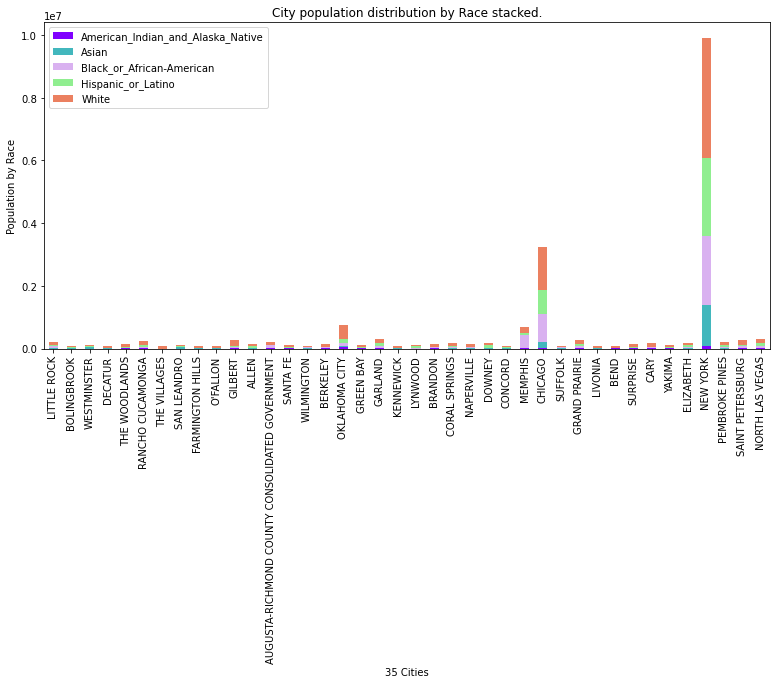

In [209]:
print("Race-based demographic distribution of US City population: \n")
City_Racial_distribution = City_Demog_Race.plot( kind='bar',x='Demog_City',\
                                      y=['American_Indian_and_Alaska_Native','Asian', 'Black_or_African-American',\
                                             'Hispanic_or_Latino', 'White'],                                          
                                            stacked=True, figsize=(13,6), \
                                            color=["#8000ff","#42b7bd","#d9b1f0","lightgreen","#eb8060"],\
                                            xlabel='35 Cities', ylabel='Population by Race',\
                                            title='City population distribution by Race stacked.')

`Obviously : ` City of `New York` has the best balanced population distribution on this stacked bar graph.

In [210]:
# write US_City_Demog_Race table to parquet files
# US_City_Demog_Race.write.mode("overwrite")\
#                        .parquet(path=output_data + 'US_City_Demog_Race/')

### `D5` -  Joining  `US_City_Demog_data` with `Port_location_df` to create a `Dimension table`

+ I chose to use `Port_Code` column from `Port_locations_df` table by joining it with `Demography table`. This inner-join will make my Demography table as a good candidate for dimension table. So renamed `US_Port` column would be my foreign key with immigration table.
+ Every Immigration port is part of US City that makes it a good candiate for primary key & foreign key.

In [211]:
dim_US_City_Demog_Race = US_City_Demog_Race.join(Port_locations_df,\
                                US_City_Demog_Race.Demog_City == Port_locations_df.Port_City, how='inner')

dim_US_City_Demog_Race = dim_US_City_Demog_Race.withColumnRenamed("Port_Code","US_Port")
dim_US_City_Demog_Race = dim_US_City_Demog_Race.drop(Port_locations_df.Port_City)
dim_US_City_Demog_Race.toPandas().head(5)

,Demog_City,State_Name,Male_Population,Female_Population,Total_Population,Median_Age,Number_Of_Veterans,Foreign_Born,Average_Household_Size,American_Indian_and_Alaska_Native,Asian,Black_or_African-American,Hispanic_or_Latino,White,US_Port,Port_State
0,YUMA,ARIZONA,48298,45847,94145,33.400002,7182.0,19326.0,2.64,1228.0,1180.0,3731.0,57054,69691.0,YUI,AZ
1,YUMA,ARIZONA,48298,45847,94145,33.400002,7182.0,19326.0,2.64,1228.0,1180.0,3731.0,57054,69691.0,YUM,AZ
2,ORLANDO,FLORIDA,130940,139977,270917,33.099998,12782.0,50558.0,2.42,2374.0,11124.0,68081.0,89306,179121.0,ORL,FL
3,SAVANNAH,GEORGIA,69389,76295,145684,30.299999,9717.0,10355.0,2.57,2116.0,5366.0,82307.0,9734,57690.0,SAV,GA
4,INDIANAPOLIS,INDIANA,410615,437808,848423,34.099998,42186.0,72456.0,2.53,8656.0,29307.0,253932.0,83426,553665.0,INP,IN


In [212]:
dim_US_City_Demog_Race.dtypes

[('Demog_City', 'string'),
 ('State_Name', 'string'),
 ('Male_Population', 'int'),
 ('Female_Population', 'int'),
 ('Total_Population', 'int'),
 ('Median_Age', 'float'),
 ('Number_Of_Veterans', 'int'),
 ('Foreign_Born', 'int'),
 ('Average_Household_Size', 'float'),
 ('American_Indian_and_Alaska_Native', 'bigint'),
 ('Asian', 'bigint'),
 ('Black_or_African-American', 'bigint'),
 ('Hispanic_or_Latino', 'bigint'),
 ('White', 'bigint'),
 ('US_Port', 'string'),
 ('Port_State', 'string')]

> Sending the dimension table back to the cloud

In [213]:
# write Monthly_US_Tempr table to parquet files
# dim_US_City_Demog_Race.write.mode("overwrite")\
#                    .parquet(path=output_data + 'dim_US_City_Demog_Race/')

### `Quick Query` :  `34` 

`34:` Immigrants `arrival city` and its `selective demography`.

In [214]:
Fact_Immigration.createOrReplaceTempView("Fact_Immigration")
dim_US_City_Demog_Race.createOrReplaceTempView("US_City_Demog_Race")

Immigrant_N_Demography = spark.sql('''
                               SELECT DISTINCT ft.Immigration_Id, ft.Arrival_Date, 
                               cd.Demog_City, cd.Port_State, cd.Foreign_Born, cd.Total_Population,
                                 cd.Average_Household_Size
                                    FROM Fact_Immigration AS ft
                                         INNER JOIN US_City_Demog_Race AS cd
                                               ON ft.Port_Code == cd.US_Port
                                WHERE Immigration_Id IS NOT NULL
                                AND Arrival_Date IS NOT NULL 
                                ''')
Immigrant_N_Demography.toPandas().head(5)

,Immigration_Id,Arrival_Date,Demog_City,Port_State,Foreign_Born,Total_Population,Average_Household_Size
0,80898,2016-04-01,DETROIT,MI,39861,677124,2.60
1,4538779,2016-04-24,LOS ANGELES,CA,1485425,3971896,2.86
2,5097572,2016-04-27,NEW YORK,NY,3212500,8550405,2.68
3,3549552,2016-04-19,NEW YORK,NY,3212500,8550405,2.68
4,1793960,2016-04-10,NEW YORK,NY,3212500,8550405,2.68


In [215]:
Immigrant_N_Demography.count()

777

### `Quick Query` :  `35` 

+ **`Total number of immigrant`, `Foreign-Born` & `population` in US-City-State**

In [216]:
Immigration_N_Demography = Immigrant_N_Demography.groupBy('Demog_City', 'Port_State').agg(count('Immigration_Id').alias('Total_Immigrants'),\
                                                                sum('Foreign_Born').alias('Total_Foreign_Born'),\
                                                                avg('Average_Household_Size').alias('Average_Household_Size'),\
                                                                sum('Total_Population').alias('Total_Population')).\
                                                                sort(col('Total_Immigrants').desc())
                                         
Immigration_N_Demography.toPandas().head(7)                                                                

,Demog_City,Port_State,Total_Immigrants,Total_Foreign_Born,Average_Household_Size,Total_Population
0,NEW YORK,NY,155,497937500,2.68,1325312775
1,MIAMI,FL,111,28947579,2.50,48949779
2,LOS ANGELES,CA,106,157455050,2.86,421020976
3,SAN FRANCISCO,CA,55,16345945,2.37,47564880
4,CHICAGO,IL,45,25805835,2.53,122425020
5,ORLANDO,FL,39,1971762,2.42,10565763
6,ATLANTA,GA,37,1184592,2.15,17163375


In [217]:
Immigration_N_Demography = Immigration_N_Demography.toPandas()
Immigration_N_Demography = Immigration_N_Demography[:35]

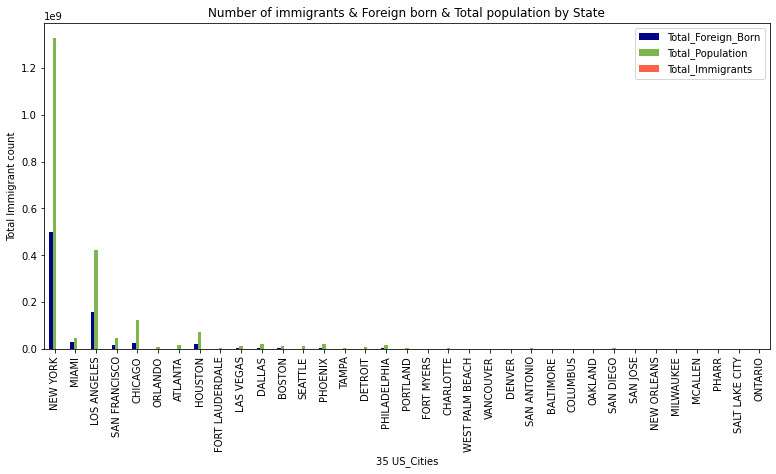

In [218]:
Immigrant_Count_City = Immigration_N_Demography.plot(kind='bar',x='Demog_City',\
                                      y=['Total_Foreign_Born', 'Total_Population','Total_Immigrants'], 
                                            stacked=False, figsize=(13,6), color=['darkblue','#7eb54e','tomato'],\
                                            xlabel='35 US_Cities', ylabel='Total Immigrant count',\
                                            title='Number of immigrants & Foreign born & Total population by State')

`Perspective: ` Number of `immigrant/tourists` population is almost non-existant compare to `total population` of a City.

In [219]:
#Immigration_N_US_Demography.withColumn('Total Branch Sum', f.sum(
#    'Female_Population').over(Window.partitionBy('Immigration_Id'))).show()

### `Quick Query:  36: `  
> Immigrants who didn't leave the country stayed which City

In [226]:
Country_Codes_df.createOrReplaceTempView("Country_Codes")
Avg_Staying_Days.createOrReplaceTempView("Staying_Days")
dim_US_City_Demog_Race.createOrReplaceTempView("City_Demography")

Staying_Immirants = spark.sql('''
                               SELECT DISTINCT st.Admission_Num, st.Citizenship_Country,
                                    st.Departure_Date, cc.Country_Names, st.Visa_Type,
                                    cd.Demog_City, cd.Foreign_Born
                               FROM Staying_Days AS st
                               INNER JOIN Country_Codes AS cc
                                     ON cc.Country_Codes == st.Citizenship_Country
                               INNER JOIN City_Demography cd
                                     ON  st.Port_Code == cd.US_Port
                               WHERE Admission_Num IS NOT NULL
                                     AND Departure_Date IS NULL
                                     AND Foreign_Born >= 50000
                               ORDER BY Demog_City ASC
                         ''')

Staying_Immirants.toPandas().head(7)

,Admission_Num,Citizenship_Country,Departure_Date,Country_Names,Visa_Type,Demog_City,Foreign_Born
0,94675779030,213,None,INDIA,B2,BOSTON,190123
1,94111066630,213,None,INDIA,B2,CHICAGO,573463
2,675423085,258,None,PAKISTAN,B2,CHICAGO,573463
3,93191572030,245,None,"CHINA, PRC",B2,CHICAGO,573463
4,93138892030,213,None,INDIA,B2,CHICAGO,573463
5,94889940930,343,None,NIGERIA,F2,HOUSTON,696210
6,17545053327,117,None,ITALY,WT,LOS ANGELES,1485425


### `Quick Query:  37: `       

### Connecting two dimension tables `Demography` and `Temperature`: 

+ Finding temperatue of a specific city should be scoped to defined dateline. Otherwise, we would end up getting mismatched temperature data. A good sub-selection of SQL code will help up to narrow our search scope. 

In [221]:
Demogrphy_N_Temperature = dim_US_City_Demog_Race.join(dim_US_Cities_Tempr, \
                           ( dim_US_City_Demog_Race.Demog_City ==  dim_US_Cities_Tempr.US_City ), how='inner')

Demogrphy_N_Temperature = Demogrphy_N_Temperature.drop(dim_US_Cities_Tempr.Port_State) 
Demogrphy_N_Temperature.toPandas().head(3) 

,Demog_City,State_Name,Male_Population,Female_Population,Total_Population,Median_Age,Number_Of_Veterans,Foreign_Born,Average_Household_Size,American_Indian_and_Alaska_Native,...,Date_Records,Year,Month_Name,Month_Num,Day,Avg_Temp,US_City,Country,US_Port,Port_State
0,ORLANDO,FLORIDA,130940,139977,270917,33.099998,12782,50558,2.42,2374,...,2000-01-01,2000,January,1,1,16.0,ORLANDO,UNITED STATES,ORL,FL
1,ORLANDO,FLORIDA,130940,139977,270917,33.099998,12782,50558,2.42,2374,...,2000-02-01,2000,February,2,1,17.0,ORLANDO,UNITED STATES,ORL,FL
2,ORLANDO,FLORIDA,130940,139977,270917,33.099998,12782,50558,2.42,2374,...,2000-03-01,2000,March,3,1,21.0,ORLANDO,UNITED STATES,ORL,FL


In [222]:
City_Temp_profile = Demogrphy_N_Temperature.groupBy("US_City","Port_State").agg(avg('Avg_Temp').alias('City_Tempr')).sort(col('City_Tempr').desc())
City_Temp_profile.show(5)

+---------------+----------+------------------+
|        US_City|Port_State|        City_Tempr|
+---------------+----------+------------------+
|          MIAMI|        FL| 23.30909090909091|
|FORT LAUDERDALE|        FL| 23.30909090909091|
|    BROWNSVILLE|        TX|22.975757575757576|
|        ORLANDO|        FL|22.587878787878786|
|         LAREDO|        TX| 22.23030303030303|
+---------------+----------+------------------+
only showing top 5 rows



In [223]:
City_Temp_profile = City_Temp_profile.toPandas()
City_Temp_profile = City_Temp_profile[:35]

Text(0.5, 1.0, 'City temperature high to low in order: ')

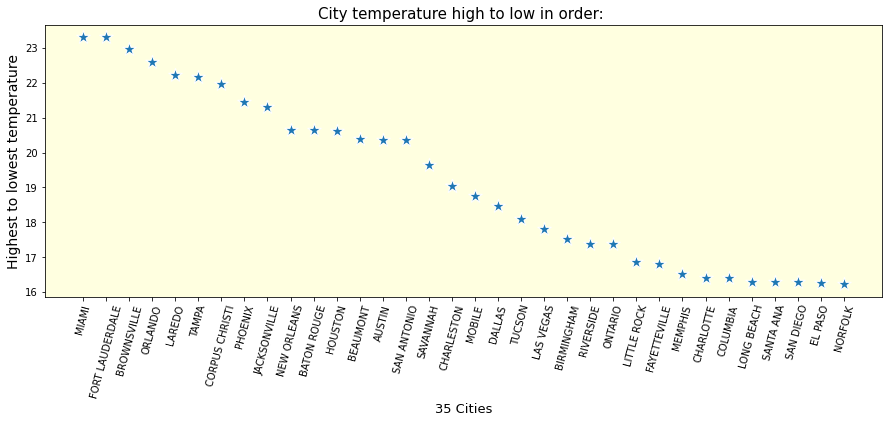

In [224]:
fig, ax = plt.subplots(figsize=(15, 5))

ax = sns.scatterplot(x="US_City", y="City_Tempr", marker='*', s=200, data=City_Temp_profile)
ax.set_facecolor("lightyellow")
plt.fontsize=16
plt.xlabel('35 Cities', fontsize=13)
plt.ylabel('Highest to lowest temperature', fontsize=14)
plt.xticks(rotation=75)
plt.title('City temperature high to low in order: ', fontsize=15)                                           

### Step 3: `Define the Data Model`

***`3.1 Conceptual Data Model`***
- Map out the conceptual data model and explain why you chose that model

> I chose `star-schema` for my data model. Considering, among all the available DWH Schema, the Star Schema Data Modelling is the most basic and straightforward. Typically, star-schema model consists of one or more Fact Tables that indexes an unlimited number of Dimensional Tables. I think, the apparent loose inter-connections among the given data-tables makes star-schema an apt choice for data model.

Star schemas are also optimized for querying large data sets, data warehouses. They support OLAP cubes, analytic applications, ad hoc queries, and business intelligence (BI). They also allow us to quickly aggregate a large number of fact records using count, sum, average, and other methods. These aggregations can be filtered and grouped (sliced and diced) by any user.

We're given 4 tables to explore out and create a data model. I find there are not enough good inter-connection present among these tables. So I had to synthesize and join tables to develop and create a working data model. 

> The concept of connecting `immigration table` with `temperature table` and `Demography table` is rather disparate. Immigration has a distant relationship with tempeature with rather close connection to demography of a city. The given features of `Airport table` has hardly any relevance to immigration dynamics. To effectively manage out available resources, I had to create multiple `inner-join` & `left-join` among these tables to build up a wroking star-schema data model.

`Data Model Design:`

I used `Fact_Immigration` table as my center-main `FACT` table. 

+ I created 2-dimension tables out of this `fact-table` and they are `Indivdual_Immigrants_Records` & `Dated_Arrival_Departure` tables both are deeply interconnected to my `fact-table`.

+ Tables most obviously relevant and connected to `fact-table` are `Port_Locations_df`, `Country_Codes` & `State_Codes` tables.

+ My choice of 2 other dimension tables are `US_City_Temperature`and `US_City_Demography_Race` table. 

+ I found there are no analytical relevancy of `Airport table` & `Immigration trable`?

It was bit challenging how to connect all of these dimension tables to my fact table beacuse of their fluid inter-connections. Yet, after all eventual coupling, I have 5 `dimension tables` and one `fact-immigration` table. Evidently, all of my dimension tables hold `one/two foreign key relations` with my fact-table. 

+ This integrated [`primary + foreign key`](https://github.com/farhadkpx/DEND-Data-Engneering-Nano-degree-/blob/main/DEND_Capstone_Project/Star_Diagram_Dictionary/Capstone_Data_Dictionary.md) based connection made a reasonable `Star-Schema-Data-Model`.

+ An obvious [`ER-diagram`](https://github.com/farhadkpx/DEND-Data-Engneering-Nano-Degree-/blob/main/DEND_Capstone_Project/Star_Diagram_Dictionary/Immigration_Fact_ER_Star_Schema_Diagram.png) is available here in my github source.

#### *`3.2 Mapping Out Data Pipelines`*

+ List the steps necessary to pipeline the data into the chosen data model

I created two data pipeline processes in two different cloud environment, one runs in `Udacity virtual workspace`, second is in the `Apache Airflow cloud environment`. 

`A.` **Capstone_ETL.py** - This is a python script it reads all the data tables from the Udacity workspace. Upon processing those tables the final cleaned, redesigned and refined versions of new tables are send to the workspace as parquet file format. These files will be instantly ready for critical data analysis.

`B.` **Apache Airflow** - It reads table-data from a source S3 storage bucket, stage them on a cloud storage space and finally load them to working tables. Airflow uses `DAG(task-based codes)` with great `GUI` helps to monitor the whole pipeline working processes. We can check the status of every aspect of the working and scheduled tasks as they moves towards the final pipeline product.

### Step 4: `Running Data Pipelines` model on `Airflow`

#### *4.1 `Create the data model`*
+ Build the data pipelines to create the data model.

The functional data model pipeline can be processed through Apache Airflow DAG systems, which helps us to visualize and implement the whole data pipeline system. The steps of this data pipelines is a sequential process can be described in multiple steps.

`A.` Under the DAG folder I designed two types of tables in first kind are tables where the incoming files will be staged and second set of tables where my final data pipeline will be implemented.

`B.` I had to use another source folder named `plugins` where we have two more folder named `helper` & `operators` were designed. The 'helper' folder holds codes to efficiate how data will be inserted into the data pipeline tables. 

`C.` The 'operator' folder contains four operators `StageToRedshiftOperator`, `LoadFactOperator` &  `LoadDimensionOperator` & `data_quality` operators to efficiate the whole pipeline processes. These operators sequentially help to read from source tables, copy them to staging tables and loads copied tables back to final fact and dimension tables.

`D.` The final `Immigration_airflow_project_dag.py` script does the accumulation of all the needed codes available which in turn drops unnecessary items and creates all the tables required by the data model pipeline first. On these processes it copies tables from S3 source, send it to stagging tables and finally loads them back to empty fact and dimension tables. The data quality operator checks whether the table data meets certain conditions as it was designed for.

+ Quck view of `StageToRedshiftOperator` tables - This operator reads  `table-data parquet files` from the `S3-source bucket` and copies it directly into a Redshift staging tables. My staging tables lists `(Fact & Dimension)` where copied parquet files will be loaded:

   Staging_Immigration_Fact_Table
   
   Staging_Individual_Immigrants_Records

   Staging_Dated_Arrival_Departure

   Staging_US_City_Temperature

   Staging_US_City_Demog_Race

   Staging_Port_Locations

   Staging_Country_Codes

   Staging_State_Codes


+ `LoadFactOperator` & `LoadDimensionOperator` - 
These two operator uses `sql_queries` to read from staging-tables and then load them into empty dimension tables. I chose to use an optional parameter called `sql_columns` to allow user to select columns in which data will be populated. These are my load-fact and dimension-tables.
   
   Fact_Immigration_Table

   dim_Individual_Immigrants_Records

   dim_Dated_Arrival_Departure

   dim_US_City_Temperature

   dim_US_City_Demog_Race

   dim_Port_Locations

   Dim_Country_Codes

   dim_State_Codes

#### 4.2 *`Data Quality Checks`*
Explain the data quality checks you'll perform to ensure the pipeline ran as expected. These could include:
 * Integrity constraints on the relational database (e.g., unique key, data type, etc.)
 * Unit tests for the scripts to ensure they are doing the right thing
 * Source/Count checks to ensure completeness

> My `data_quality.py` operator checks on final data tables should not have any empty values.

#### 4.3 *`Data dictionary`* 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.

- The designed data dictionary for my star-schema data model is available with this [Data-Dictionary](https://github.com/farhadkpx/DEND-Data-Engneering-Nano-Degree-/blob/main/DEND_Capstone_Project/Data_Dictionary.md)

### Step 5: `Complete Project Write Up`
* `Clearly state the rationale for the choice of tools and technologies for the project.`

I can categrize 3 main tools I chose to use for this project are: 

`1.` *`Pyspark progrmming language:`* I chose `Pyspark distributed data processing framework` which uses python API. It is a very efficient tool for real-time data analysis with big data tables, since it uses parallel computing.

`2.` *`Amazon S3 & Redshift services:`* We know `Amazon Web Services (AWS)` is the largest public cloud provider offers a cloud-based, petabyte-scale data-warehousing service. The service is called `Amazon Redshift`, the most popular cloud data warehouse. Also `Amazon S3` is a highly scalable operational storage with low latency data processing environment in the cloud. 

One can access and retrieve data from `Amazon S3` storage anywhere in the world. Quering large scale data using `Amazon Redshift` is fully managed, inexpensive and secured. In addition `Redshift` is hosted directly on Amazon S3 storage Services and has a flexible functional architecture.

`3.` *`Apache Airflow Pipline:`* The Apache Airflow provides an extensive scope of running, scheduling the data-pipeline tasks. We can fragment different tasks using DAGS. Airflow's scheduling & sequencing capability of data pipeline tasks makes pipeline processes automatically runing, updated and we can monitor pipeline tasks on real-time visually. 

+ *`Propose how often the data should be updated and why?`*
> Considering the `Immigration Table` which is the main `fact-table` officially gets updated by monthly, it is reasonable to say that we can go either bi-weekly or monthly as practiced. However, `Temperature table` must be updated `daily`. `Demography data` is complicated and expensive, so it could go 6 to 12 months period as resources are avaialble. Besides, the analytical necessity to evaluate demographic data is mostly always historical in perspective, so instant update is not necessary.

### Write a description of how you would approach the problem differently under the following scenarios:
 `A.` The data was increased by 100x.
 
 `B.` The data populates a dashboard that must be updated on a daily basis by 7am every day.
 
 `C.` The database needed to be accessed by 100+ people.

**Scenario A:  `If the data was increased by 100x:`**

Under that kind of scenario I'd run these coding processes on a more powerful computing environment with AWS. For instance, I'd use `Amazon EMR (Elastic MapReduce)` in a managed cluster platform that simplifies running big data frameworks as such Apache Spark. EMR can process and analyze vast amounts of data and lets user to transform and move data into and out of other AWS data stores and databases, such as Amazon Simple Storage Service (Amazon S3) and Amazon DynamoDB.


**Scenario B: `If the pipelines were run on a daily basis by 7am:`**

We can use `Apache Airflow` with set timeline (in this case around 6:15 am) to run the whole ETL data pipeline on  hourly, daily basis or as needed. Apache Airflow does compatible integration with Python and AWS programming working environment. Also we can use Service Level Agreement (SLA) of sending emails in the event a task exceeds its expected time frame from the start of the DAG execution using time delta. These tools can be utilized for monitoring the performance of Airflow DAG tasks.


**Scenario C: `If the database needed to be accessed by 100+ people:`**

Amazon Redshift can handle up to 500 connections, 2500 saved queries simultaneously, securely and efficiently with live data sharing within across AWS user accounts. User can easily, instantly and securely  query live data from a Redshift cluster with permissions. So we can move this database to Redshift with confidence to handle this kind of needed request. The cost structure should be explored as needed.